# **Statystyczna analiza danych treningowych użytkowników siłowni**


# 1 Charakterystyka danych źródłowych oraz określenie celu analizy.

Niniejszy projekt opiera się na zbiorze danych zawierającym **informacje o użytkownikach siłowni** – ich cechach demograficznych, parametrach fizjologicznych oraz nawykach treningowych. Dane obejmują 973 obserwacje, zawierające m.in. wiek, płeć, wagę, wzrost, poziom doświadczenia, częstotliwość i typ treningów, a także takie wskaźniki wydolności jak tętno, spalone kalorie czy czas trwania sesji, zgodnie z poniższa tabela.

| Nazwa pola                  | Opis                                                                 |
|----------------------------|----------------------------------------------------------------------|
| Wiek                       | Wiek użytkownika siłowni                                             |
| Płeć                       | Płeć użytkownika siłowni (mężczyzna lub kobieta)                     |
| Waga (kg)                  | Waga członka w kilogramach                                           |
| Wzrost (m)                 | Wzrost użytkownika w metrach                                         |
| Max_BPM                    | Maksymalne tętno (uderzenia na minutę) podczas sesji treningowych   |
| Avg_BPM                    | Średnie tętno podczas sesji treningowych                            |
| Resting_BPM                | Tętno w spoczynku przed treningiem                                  |
| Session_Duration (hours)   | Czas trwania każdej sesji treningowej w godzinach                   |
| Calories_Burned            | Całkowita liczba kalorii spalonych podczas każdej sesji             |
| Workout_Type               | Rodzaj wykonanego treningu (np. kardio, siłowy, joga, HIIT)         |
| Fat_Percentage             | Procent tkanki tłuszczowej użytkownika                              |
| Water_Intake (liters)      | Dzienne spożycie wody podczas treningu                              |
| Workout_Frequency (days/week) | Liczba sesji treningowych w tygodniu                           |
| Experience_Level           | Poziom doświadczenia, od początkującego (1) do eksperta (3)         |
| BMI                        | Wskaźnik masy ciała, obliczany na podstawie wzrostu i wagi          |

**Celem analizy** jest **identyfikacja wzorców zachowań i zależności** pomiędzy cechami fizycznymi, demograficznymi oraz parametrami treningowymi użytkowników siłowni. W szczególności analiza ma na celu odpowiedź na następujące pytania:
- Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?
- Co najbardziej wpływa na liczbę spalanych kalorii?
- Czy kobiety częściej wybierają jogę?
- Czy picie większej ilości wody oznacza dłuższy trening?
- Jakie są typowe profile użytkowników siłowni – i czym się różnią?

# 2 Przegląd danych

## 2.1 Wczystanie oraz zapoznanie się z danymi

In [231]:
# Importowanie bibliotek
import numpy as np            # Obsługa operacji numerycznych i macierzy
import pandas as pd           # Praca z danymi tabelarycznymi w formie DataFrame
import seaborn as sns         # Wizualizacje statystyczne oparte na matplotlib
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt  # Tworzenie wykresów i rysunków

In [232]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [233]:
# wczytanie danych
df = pd.read_csv('silownia_new.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
1,46.0,Female,74.9,1.53,179,151,66,1.30,883,NaN,33.9,2.1,4,2,32.00
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
3,25.0,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38.0,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [234]:
# kształt DataFrame
df.shape

(973, 15)

In [235]:
# typy danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            873 non-null    float64
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    int64  
 9   Workout_Type                   823 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [236]:
# sprawdzanie duplikatów
df.duplicated().any()

np.False_

In [237]:
# sprawdzenie brakujcych wartości w każdej kolumnie
df.isna().sum()

Age                              100
Gender                             0
Weight (kg)                        0
Height (m)                         0
Max_BPM                            0
Avg_BPM                            0
Resting_BPM                        0
Session_Duration (hours)           0
Calories_Burned                    0
Workout_Type                     150
Fat_Percentage                     0
Water_Intake (liters)              0
Workout_Frequency (days/week)      0
Experience_Level                   0
BMI                              150
dtype: int64

Zbiór danych składa się z 973 obserwacji oraz 15 zmiennych, obejmujących zarówno **cechy ilościowe** (float64, int64), jak i **jakościowe** (object). Zmienne kategoryczne to Gender (płeć) oraz Workout_Type (rodzaj treningu). Większość zmiennych nie zawiera braków, z wyjątkiem Age, Workout_Type, BMI. Pozostałe kolumny są kompletne

## 2.2 Sprawdzenie spójności danych

In [238]:
def check_rules(df):
    rules = {
        # Ogólne reguły
        "Age > 0": df["Age"].fillna(0) > 0,
        "Weight (kg) > 30": df["Weight (kg)"] > 30, 
        "Height (m) between 1.3 and 2.3": df["Height (m)"].between(1.3, 2.3),
        "BMI between 10 and 60": df["BMI"].between(10, 60),  
        "Calories_Burned > 0": df["Calories_Burned"] > 0,  
        "Calories_Burned < 2000": df["Calories_Burned"] < 2000, 
        "Workout_Frequency <= 7": df["Workout_Frequency (days/week)"] <= 7, 
        "Water_Intake < 10L": df["Water_Intake (liters)"] < 10, 
        "Experience_Level in [1, 2, 3]": df["Experience_Level"].isin([1, 2, 3]),
        "Workout_Type is not null": df["Workout_Type"].notna(), 
        "Session_Duration between 0.2 and 5h": df["Session_Duration (hours)"].between(0.2, 5),

        # Reguły tętna
        "Resting_BPM between 30 and 100": df["Resting_BPM"].between(30, 100),  # OK
        "Avg_BPM > Resting_BPM": df["Avg_BPM"] >= df["Resting_BPM"],  # OK, średnie tętno >= spoczynkowego
        "Max_BPM >= Avg_BPM": df["Max_BPM"] >= df["Avg_BPM"] ,  # OK, max tętno > średnie tętno
        "Max_BPM <= 220": df["Max_BPM"] <= 220,  # OK, górny realistyczny limit

        # Reguła BMI zgodności ze wzorem (z tolerancją ±0.2)
        "BMI == Weight / Height^2 (~0.2 margin)": (
            abs(df["BMI"] - (df["Weight (kg)"] / (df["Height (m)"] ** 2))) < 0.2
        ),  # OK

        # Reguły zależne od płci
        "Fat_Percentage (Male: 5–40)": df.loc[df["Gender"] == "Male", "Fat_Percentage"].between(5, 40).reindex(df.index, fill_value=True),
        "Fat_Percentage (Female: 10–50)": df.loc[df["Gender"] == "Female", "Fat_Percentage"].between(10, 50).reindex(df.index, fill_value=True),
    }
    return rules

rules = check_rules(df)

for rule, result in rules.items():
    status = " OK" if result.all() else f" {(~result).sum()} błędnych"
    print(f"{rule}: {status}")

Age > 0:  100 błędnych
Weight (kg) > 30:  OK
Height (m) between 1.3 and 2.3:  OK
BMI between 10 and 60:  150 błędnych
Calories_Burned > 0:  OK
Calories_Burned < 2000:  OK
Workout_Frequency <= 7:  OK
Water_Intake < 10L:  OK
Experience_Level in [1, 2, 3]:  OK
Workout_Type is not null:  150 błędnych
Session_Duration between 0.2 and 5h:  OK
Resting_BPM between 30 and 100:  OK
Avg_BPM > Resting_BPM:  OK
Max_BPM >= Avg_BPM:  23 błędnych
Max_BPM <= 220:  OK
BMI == Weight / Height^2 (~0.2 margin):  150 błędnych
Fat_Percentage (Male: 5–40):  OK
Fat_Percentage (Female: 10–50):  OK


In [239]:
# Sprawdzamy naruszenia reguł
violations = {rule: ~result for rule, result in rules.items()}

# Podsumowujemy je
summary = {rule: violation.sum() for rule, violation in violations.items()}

# Wydruk
print("\nSummary of Violations:")
for rule, count in summary.items():
    print(f"{rule}: {count} violations")


Summary of Violations:
Age > 0: 100 violations
Weight (kg) > 30: 0 violations
Height (m) between 1.3 and 2.3: 0 violations
BMI between 10 and 60: 150 violations
Calories_Burned > 0: 0 violations
Calories_Burned < 2000: 0 violations
Workout_Frequency <= 7: 0 violations
Water_Intake < 10L: 0 violations
Experience_Level in [1, 2, 3]: 0 violations
Workout_Type is not null: 150 violations
Session_Duration between 0.2 and 5h: 0 violations
Resting_BPM between 30 and 100: 0 violations
Avg_BPM > Resting_BPM: 0 violations
Max_BPM >= Avg_BPM: 23 violations
Max_BPM <= 220: 0 violations
BMI == Weight / Height^2 (~0.2 margin): 150 violations
Fat_Percentage (Male: 5–40): 0 violations
Fat_Percentage (Female: 10–50): 0 violations


Jaki procent % danych ma błędy?

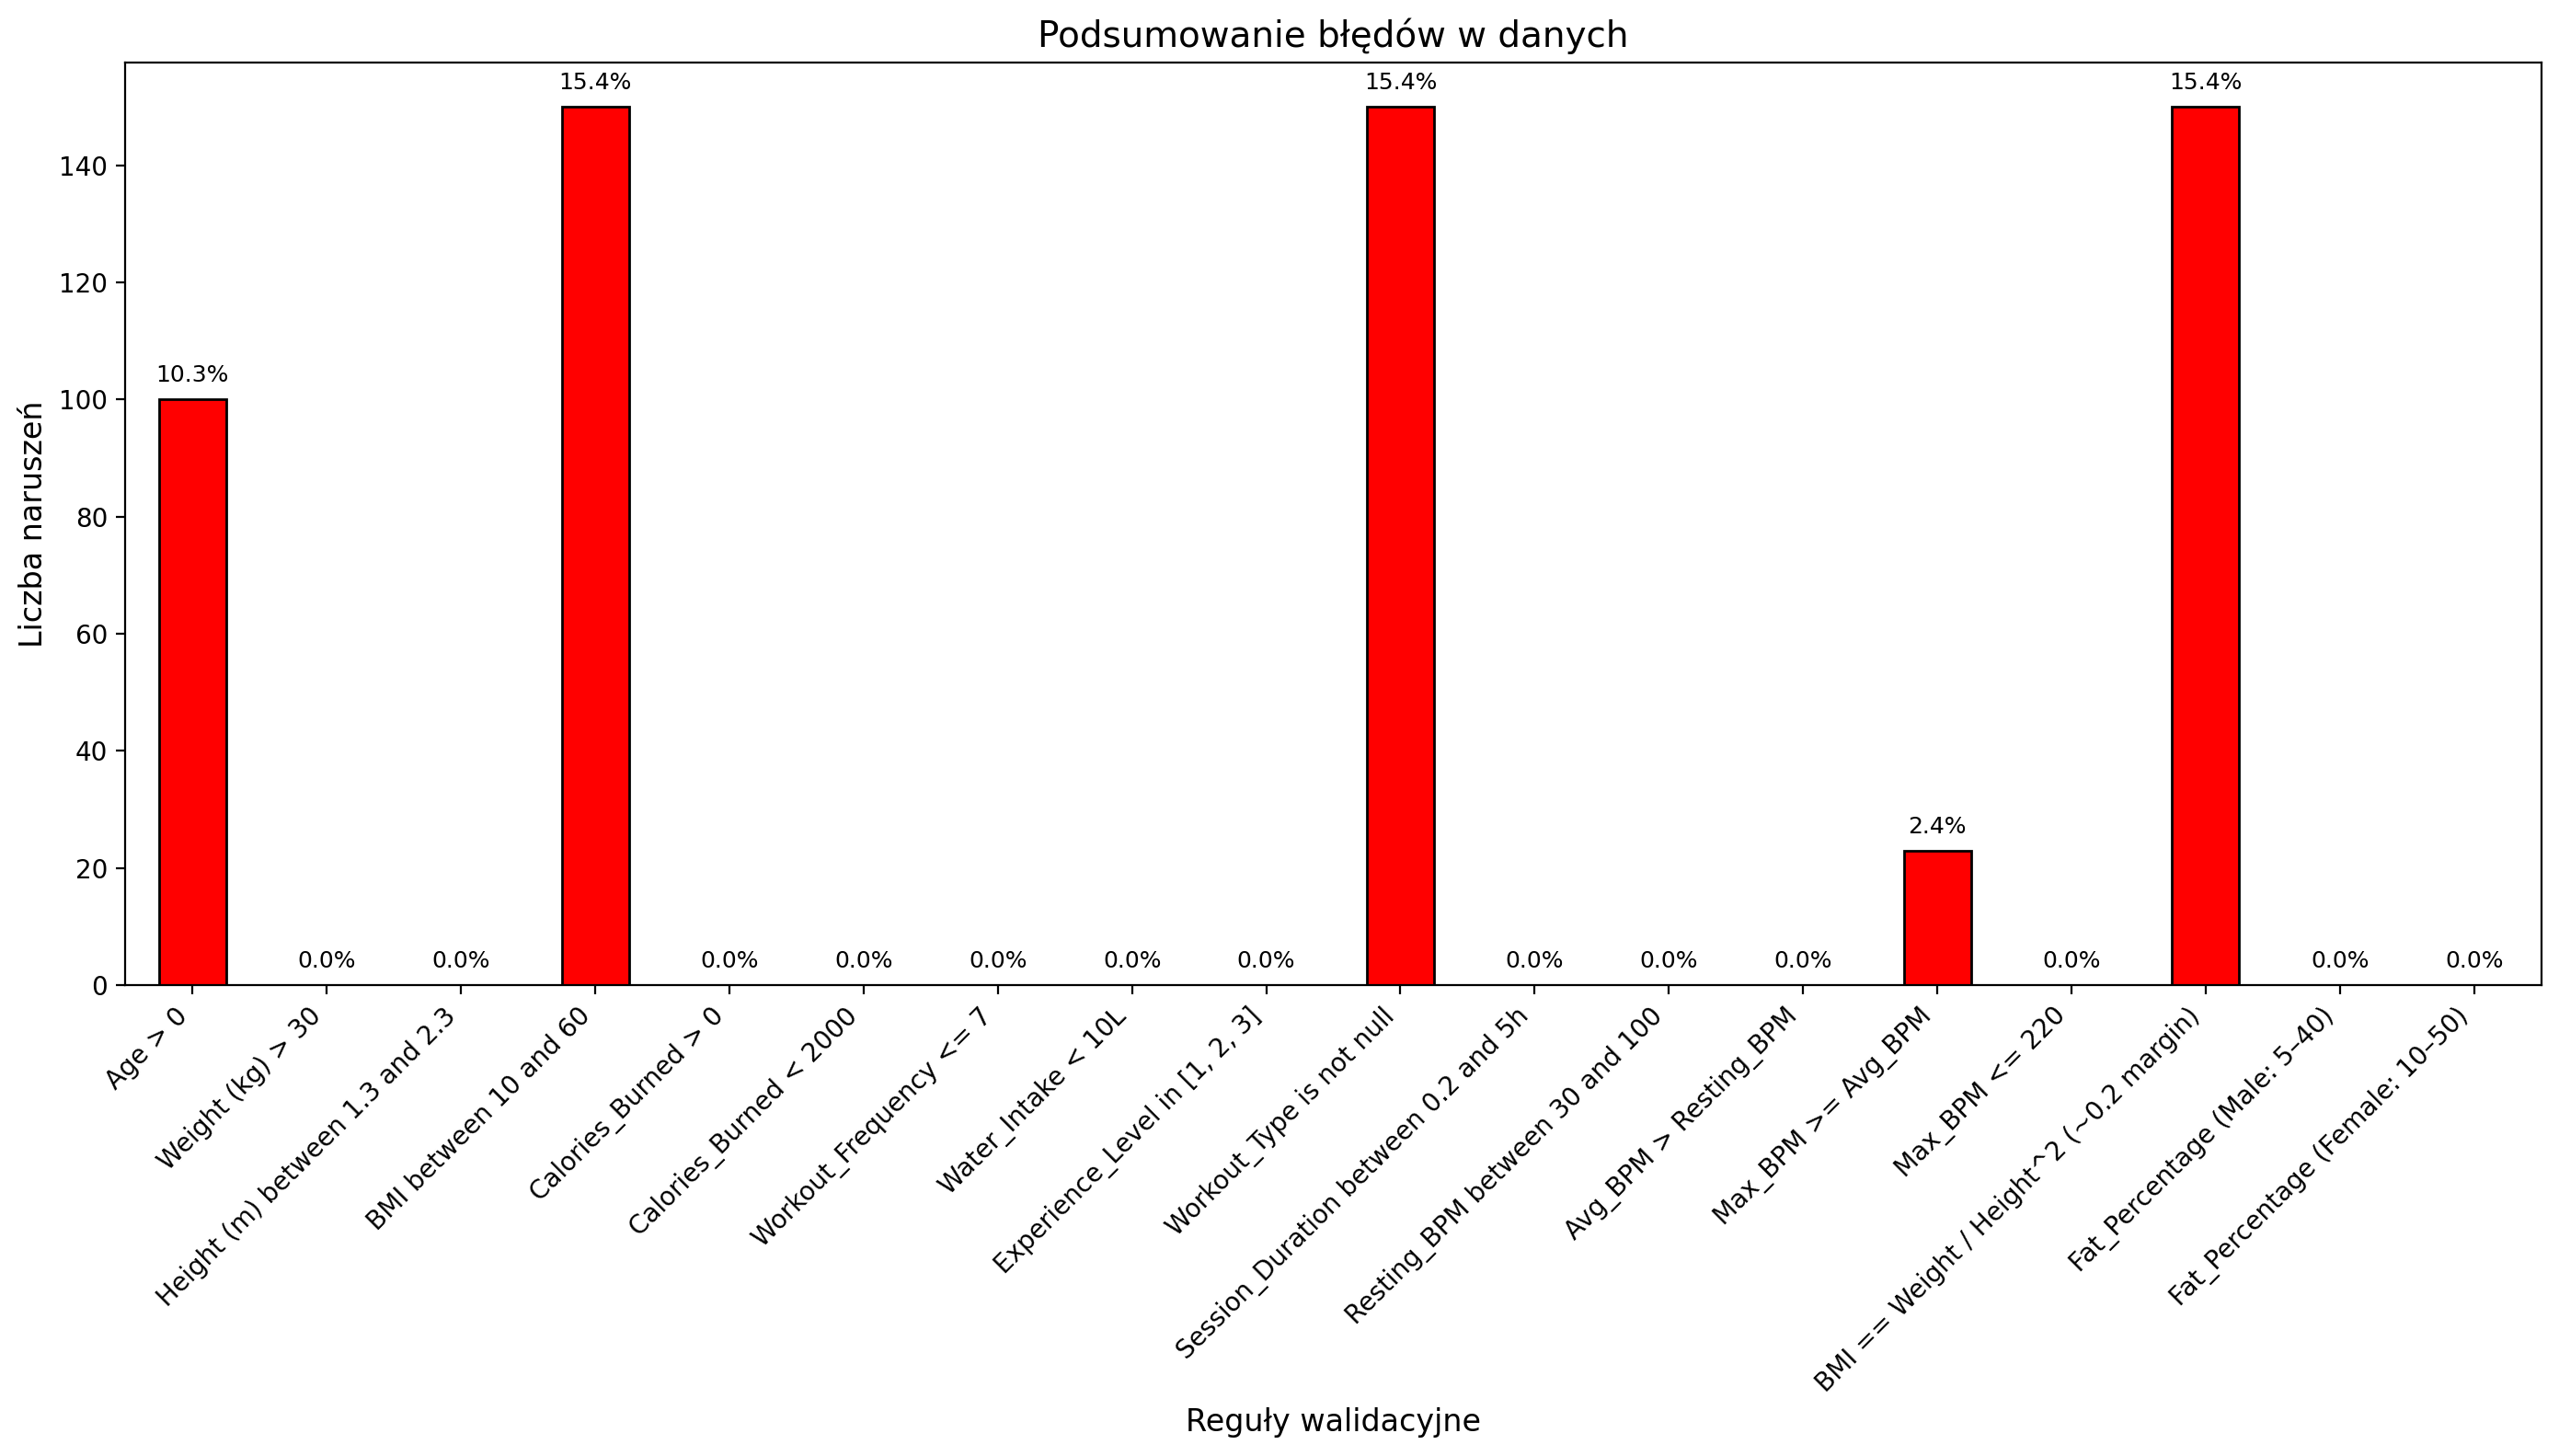

In [240]:
# import matplotlib.pyplot as plt
# import pandas as pd

# Krok 1: Zidentyfikuj naruszenia (gdzie reguła == False)
violations = {rule: ~result for rule, result in rules.items()}

# Krok 2: Podsumuj liczbę naruszeń dla każdej reguły
summary = {rule: violation.sum() for rule, violation in violations.items()}

# Krok 3: Stwórz wykres
violation_counts = pd.Series(summary)

ax = violation_counts.plot(kind='bar', figsize=(14, 8), color='red', edgecolor='black')
plt.title('' \
'Podsumowanie błędów w danych', fontsize=14)
plt.xlabel('Reguły walidacyjne', fontsize=12)
plt.ylabel('Liczba naruszeń', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Dodanie etykiet procentowych nad słupkami
total_rows = len(df)
for p in ax.patches:
    count = p.get_height()
    percent = (count / total_rows) * 100
    ax.annotate(f'{percent:.1f}%', 
                (p.get_x() + p.get_width() / 2., count), 
                ha='center', va='bottom', 
                fontsize=9, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## 2.3 Diagnostyka danych

**Max_BPM < Avg_BPM - usuwanie niepoprawnych danych**

In [241]:
# kod do wyświetlenia naruszeń reguły
violated_rows = df[df["Max_BPM"] < df["Avg_BPM"]]
print(violated_rows.to_string(index=False))

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
19.0 Female         64.0        1.53      166      167           58                      1.33             1111         HIIT            29.8                    2.3                              3                 2 27.34
24.0   Male         54.7        1.74      160      167           53                      0.84              772         Yoga            22.9                    3.6                              3                 1   NaN
59.0 Female         65.5        1.52      161      162           61                      1.40             1021         Yoga            31.2                    2.1                              3                 2 28.35
59.0 Female         54.6        1.57      164      169           64                      0.58              441       Cardio     

Maksymalna wartość Max_BPM powinna być co najmniej równa średniej, bo średnia nigdy nie przekroczy maksimum Avg_BPM (Max_BPM < Avg_BPM jest nielogiczne).
Oznacza to, ze dane zostały błędnie zarejestrowane, kolumny zamienione lub przyczyna mogła być inna. W tym przypadku **dane zostaną usunięte**.

In [242]:
# archiwizowanie błędów
df_errors = df[df["Max_BPM"] < df["Avg_BPM"]]
df_errors

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
16,19.0,Female,64.0,1.53,166,167,58,1.33,1111,HIIT,29.8,2.3,3,2,27.34
46,24.0,Male,54.7,1.74,160,167,53,0.84,772,Yoga,22.9,3.6,3,1,NaN
56,59.0,Female,65.5,1.52,161,162,61,1.40,1021,Yoga,31.2,2.1,3,2,28.35
95,59.0,Female,54.6,1.57,164,169,64,0.58,441,Cardio,29.2,2.3,3,1,22.15
106,41.0,Male,71.7,1.96,162,168,51,0.51,424,Yoga,27.3,2.5,2,1,18.66
230,28.0,Male,76.3,1.62,161,162,70,1.16,1034,Strength,20.1,2.3,3,2,29.07
310,52.0,Female,64.9,1.51,164,165,68,1.83,1359,HIIT,18.2,2.7,4,3,28.46
326,48.0,Male,69.0,1.74,160,167,58,1.48,1223,HIIT,30.0,2.3,3,2,22.79
356,31.0,Female,62.5,1.62,168,169,74,1.56,1318,NaN,16.5,2.7,4,3,NaN
365,39.0,Female,60.6,1.65,162,167,63,0.92,768,HIIT,27.6,1.7,3,1,22.26


**Utworzenie nowego Data Frame dirty_df po usunięciu (Max_BPM < Avg_BPM) niepoprawnych danych i do dalszej analizy**

In [243]:
dirty_df = df[df["Max_BPM"] >= df["Avg_BPM"]]
dirty_df = dirty_df.copy()
dirty_df.shape

(950, 15)

### Braki danych (missing values)

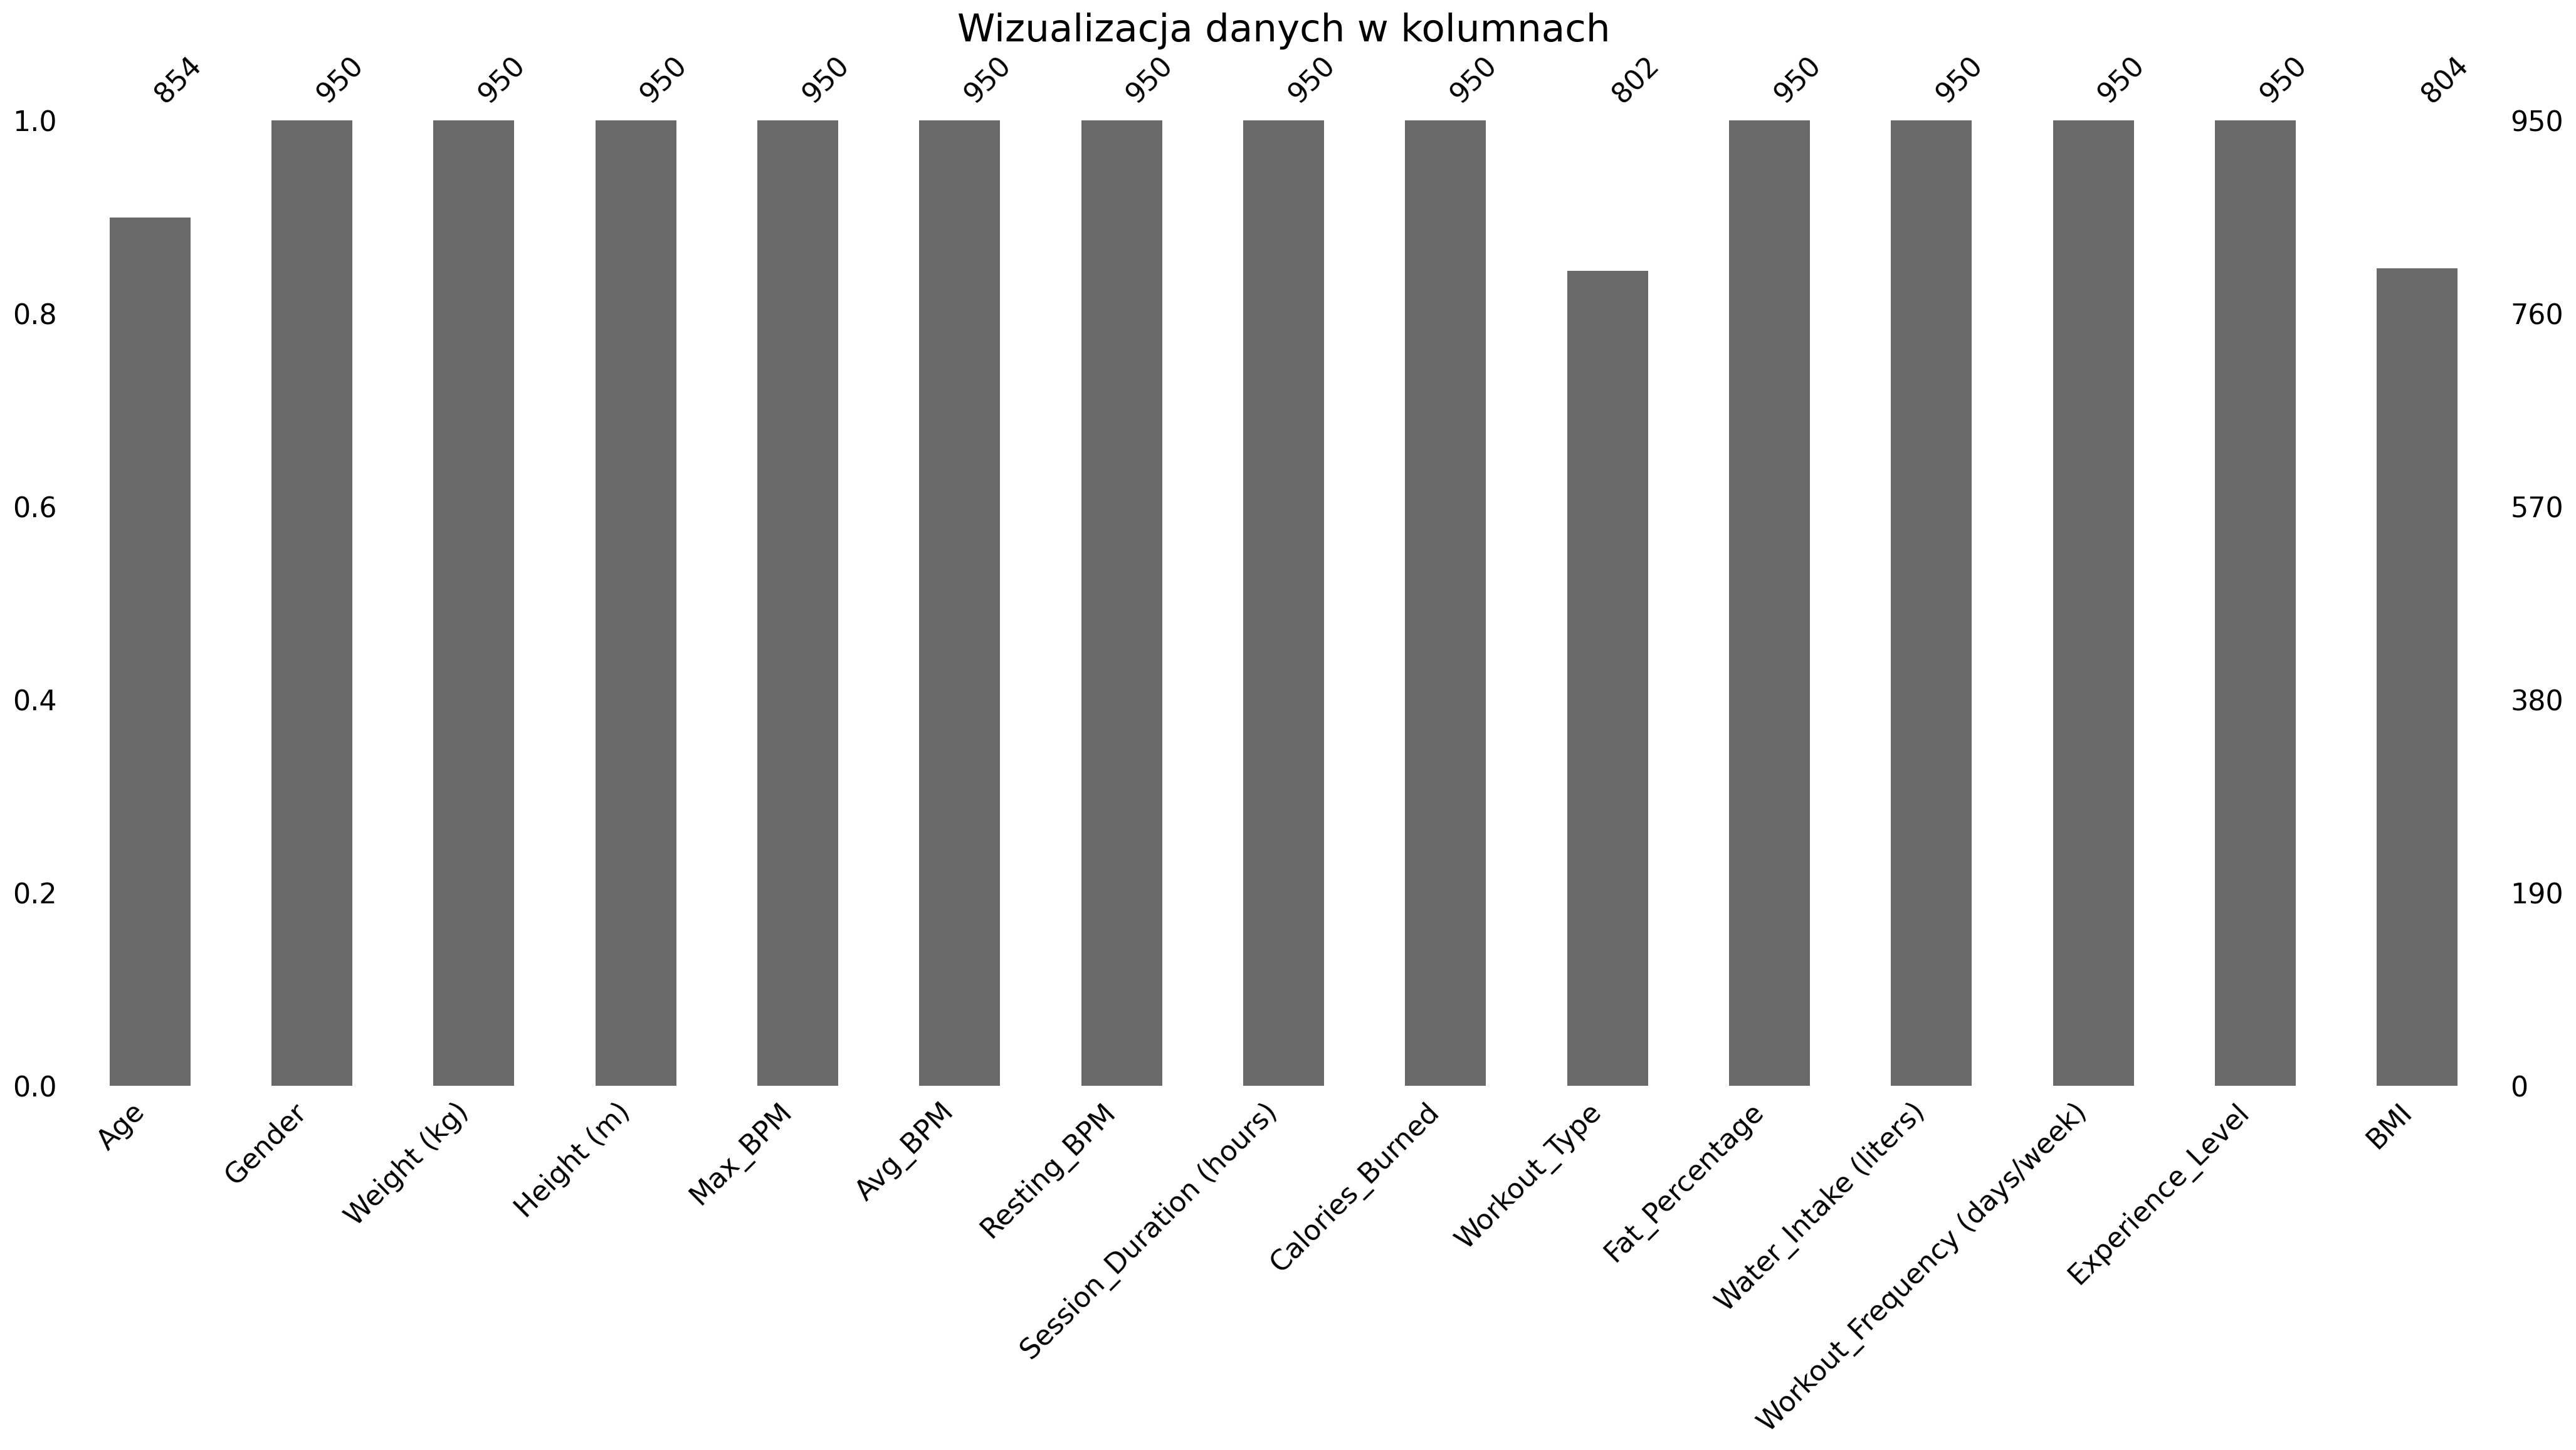

In [244]:

# plt.figure(figsize=(12, 8))
msno.bar(dirty_df)
plt.title("Wizualizacja danych w kolumnach", size=22)
plt.show()

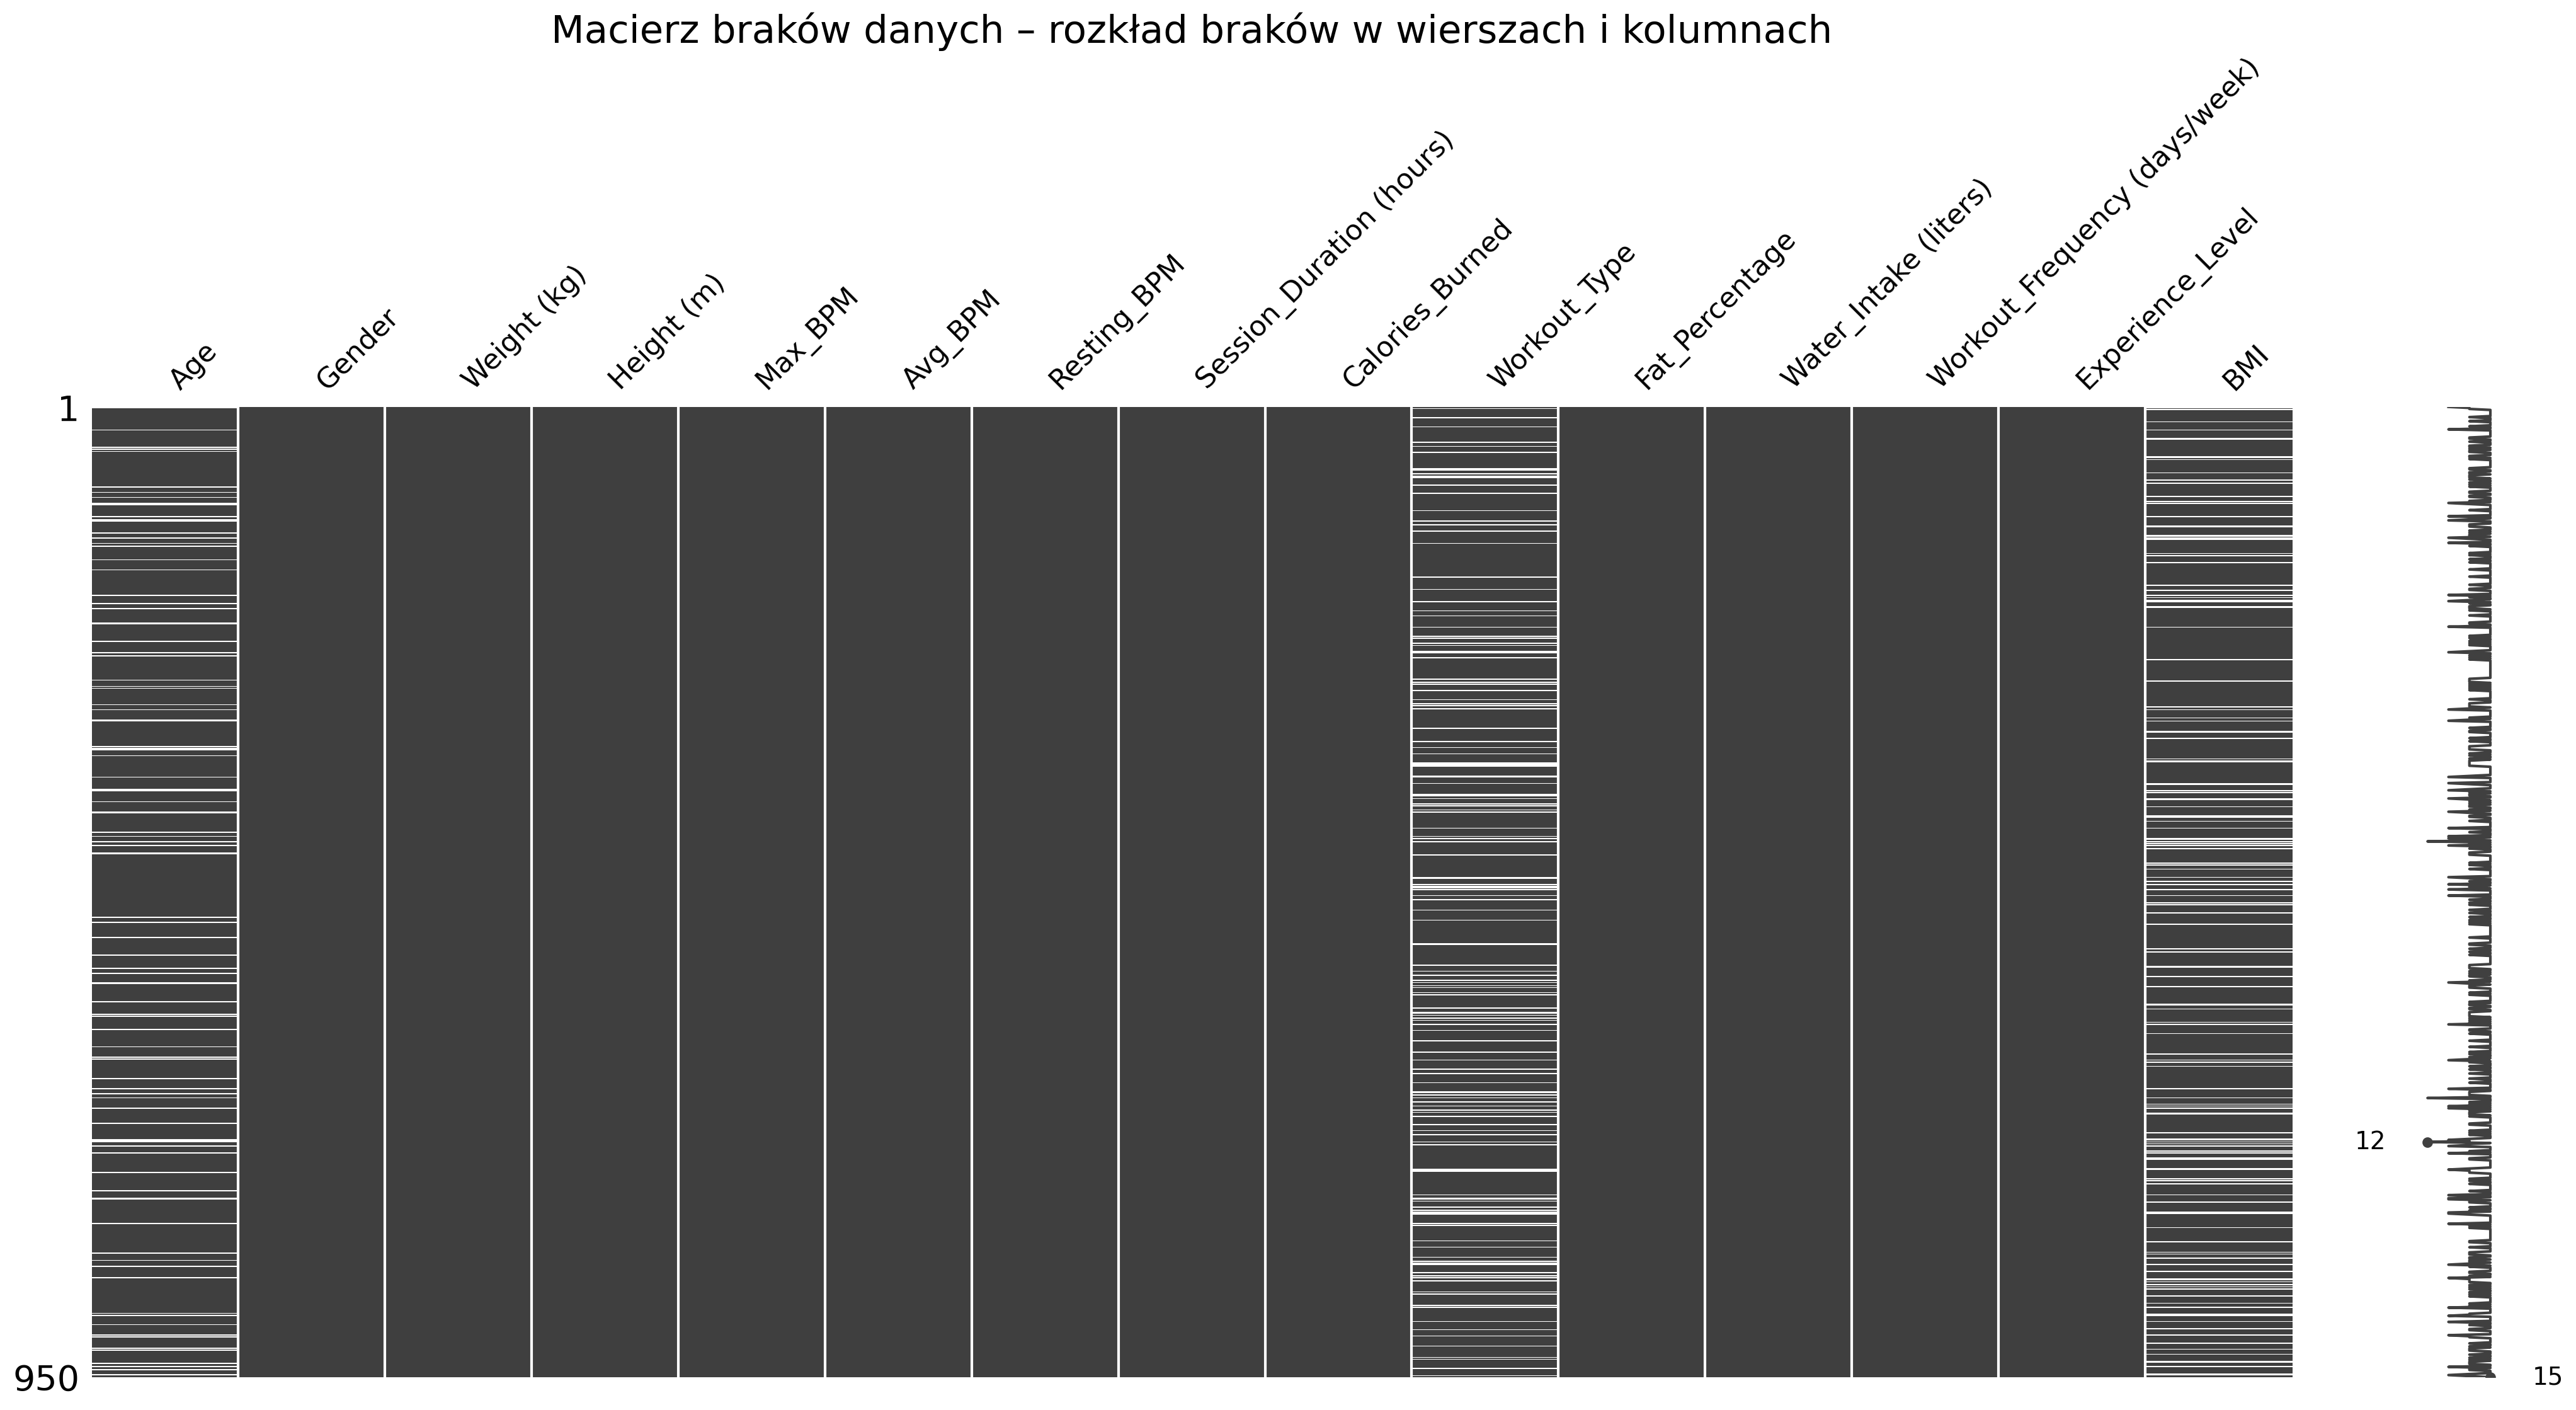

In [245]:
# Rozkład braków na poziomie wierszy
msno.matrix(dirty_df)
plt.title('Macierz braków danych – rozkład braków w wierszach i kolumnach', size=22);

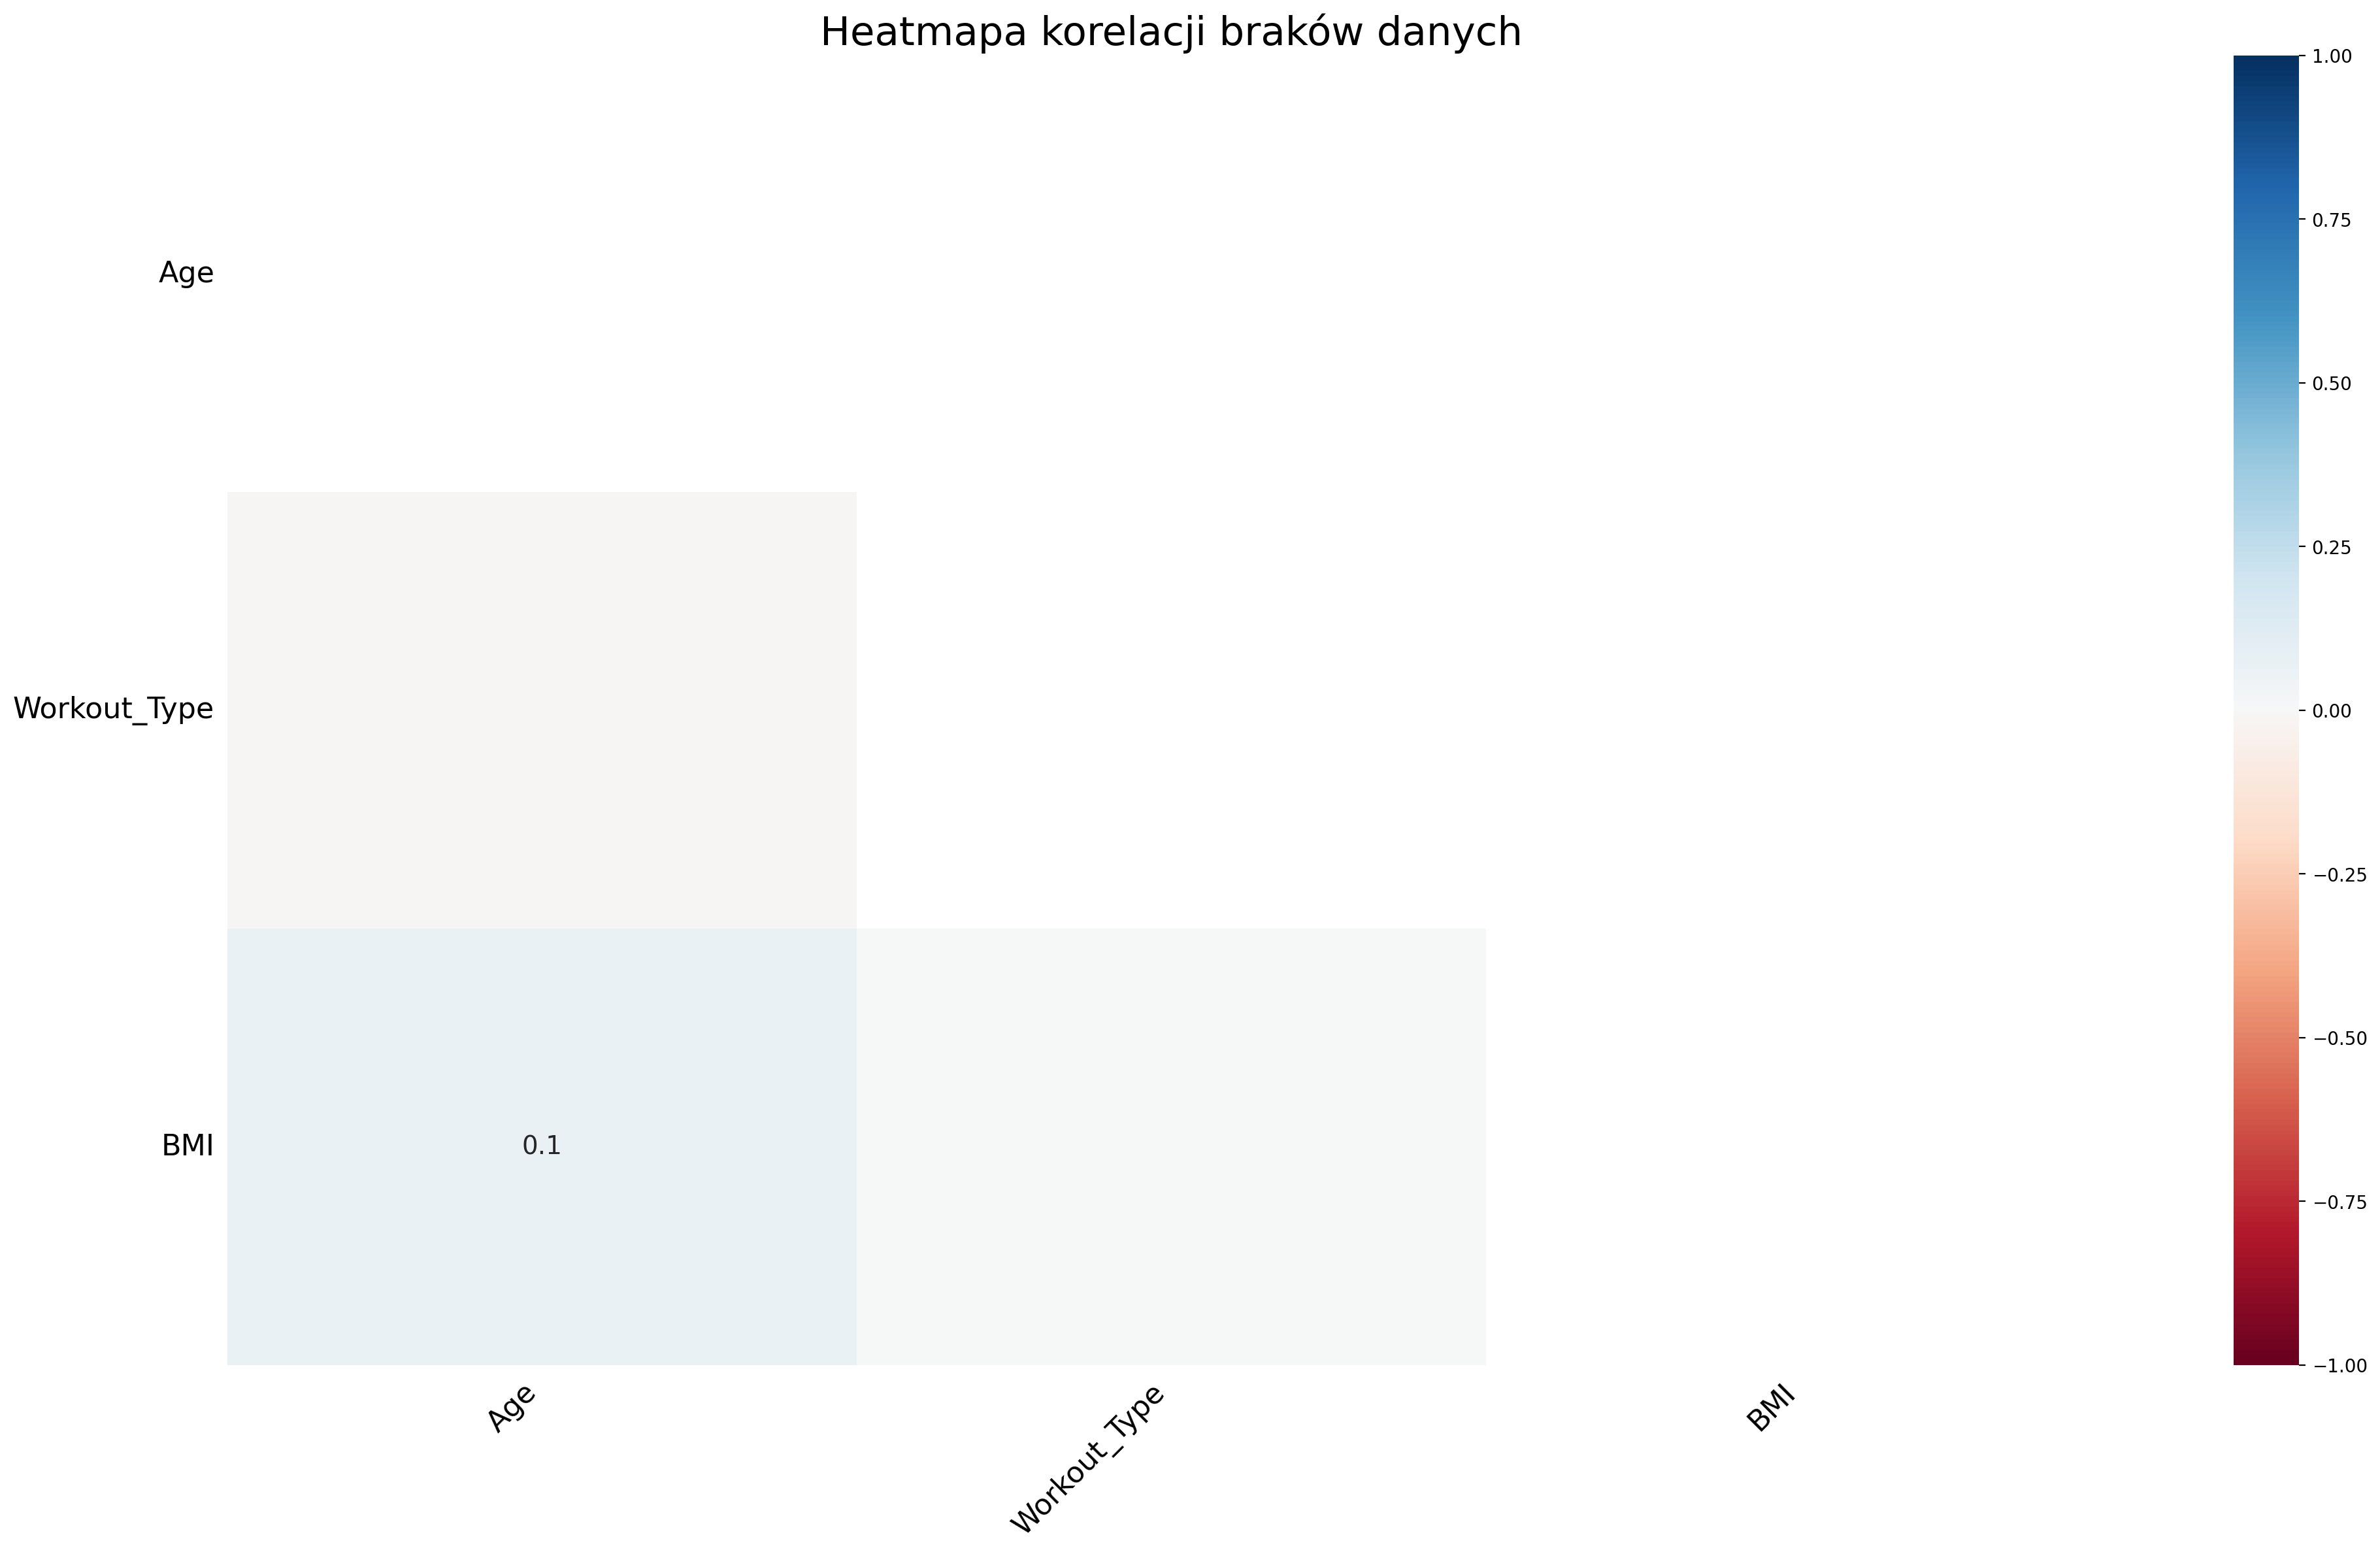

In [246]:
# Mapa korelacji braków
msno.heatmap(dirty_df)
plt.title("Heatmapa korelacji braków danych", size=22)
plt.tight_layout()
plt.show()

Tabela korelacji braków:

In [247]:
# Wybieramy tylko kolumny zawierające braki danych
cols_with_nan = dirty_df.columns[dirty_df.isnull().any()]
df_with_nan = dirty_df[cols_with_nan]

# Zamieniamy NaN na 1 (brak) i 0 (brak braków), obliczamy korelację
missing_corr = df_with_nan.isnull().astype(int).corr()

# Wyświetlenie tabeli korelacji braków
print("Tabela korelacji braków między kolumnami:")
print(missing_corr)

Tabela korelacji braków między kolumnami:
                   Age  Workout_Type       BMI
Age           1.000000     -0.009205  0.070173
Workout_Type -0.009205      1.000000  0.002050
BMI           0.070173      0.002050  1.000000


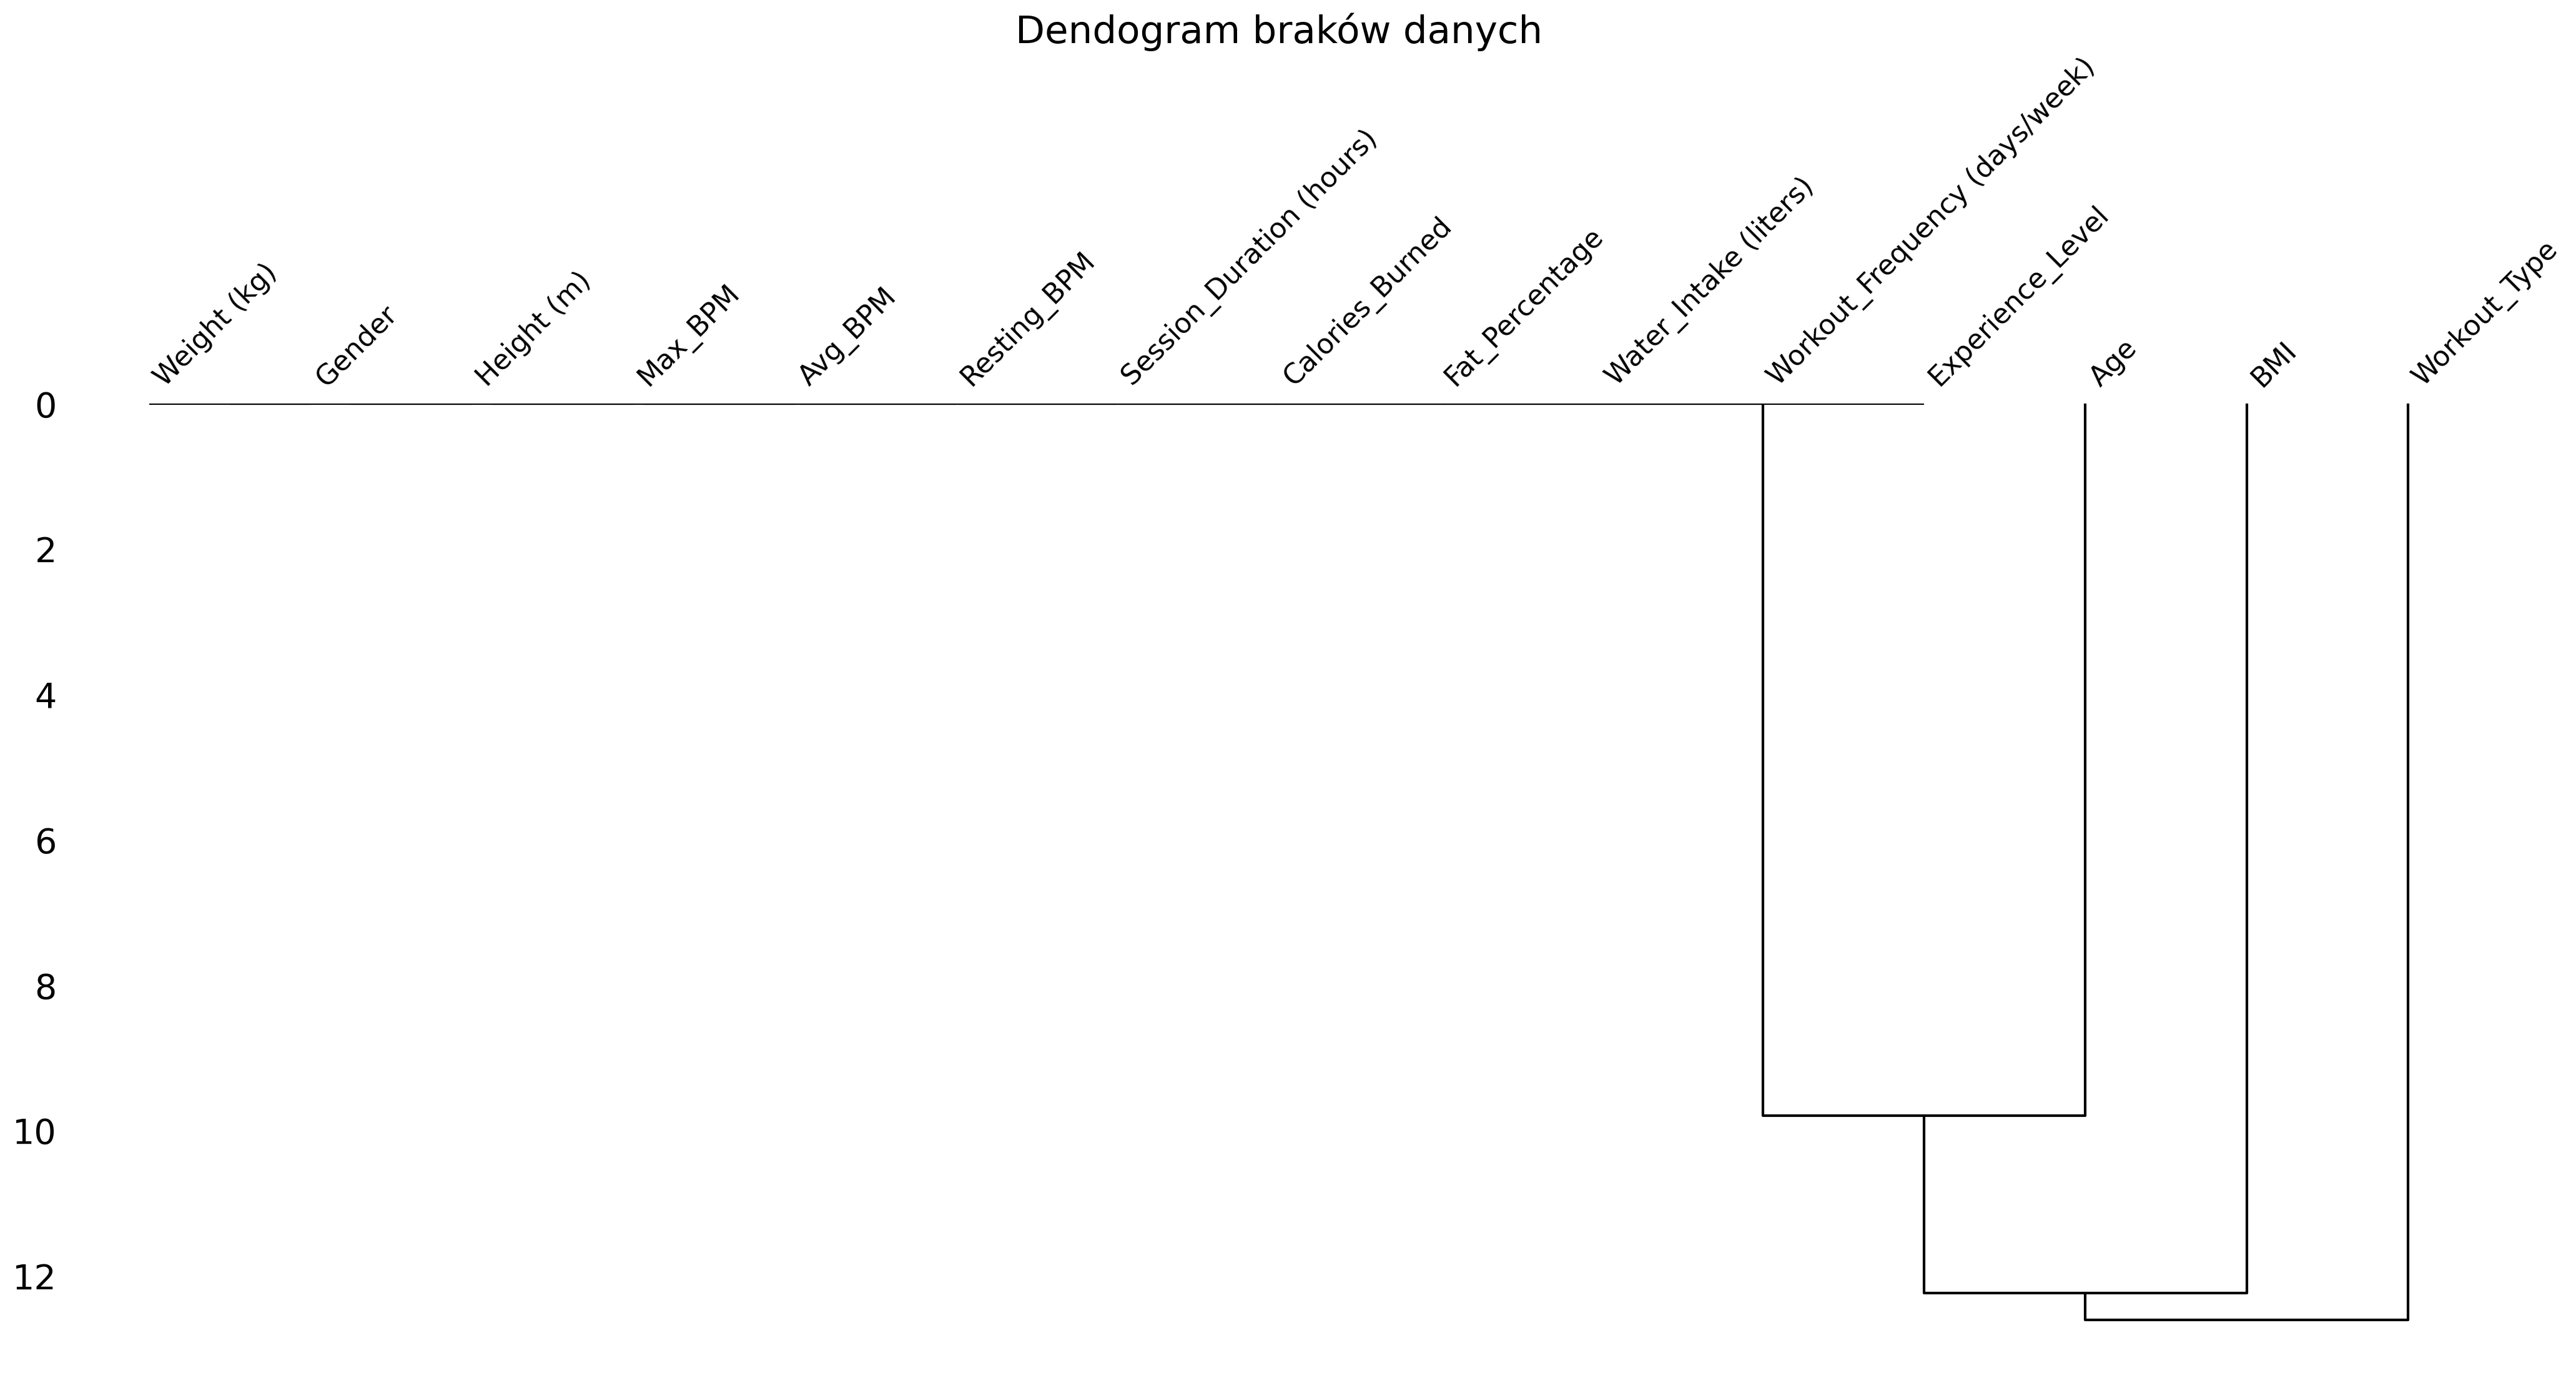

In [248]:
msno.dendrogram(dirty_df)
plt.title('Dendogram braków danych', size=22);

Linie łączące kolumny pokazują, **jak podobne są wzorce braków** między nimi.
Im niżej (w pionie) łączą się kolumny, tym bardziej podobne są ich wzorce braków.
**Dystans bliski zeru** oznacza, że kolumny mają identyczny wzorzec (w naszym przypadku nie mają braków).

**Tabela korelacji braków:**

**Słaba dodatnia korelacja braków pomiędzy Age oraz BMI.**
Braki są bardzo słabo skorelowane między kolumnami (wszystkie wartości bliskie zera) co oznacza, że braki w nich są niezależne od siebie.
* wartość dodatnia - braki występują razem
* wartość ujemna - braki nie występują razem


Dane prawdopodobnie są MCAR (Missing Completely At Random).

MCAR oznacza, że braki występują losowo, niezależnie od wartości innych zmiennych lub od samych braków.

Mozna bezpiecznie:
- imputować dane (np. średnią, medianą, modelem regresji itp.),
lub, w niektórych przypadkach, usuwać wiersze z brakami, bez ryzyka zniekształcenia danych.
- imputować braki za pomocą KNN (K-Nearest Neighbors)

### 2.4 Imputacja braków BMI, Age, Workout_Type

**Imputacja brakujących danych BMI**

BMI (Body Mass Index) to **wskaźnik masy ciała**, który pozwala oszacować, czy masa ciała osoby jest w proporcji do jej wzrostu.

Obliczamy go według wzoru:
$$
BMI = \frac{masa\ ciała\ [kg]}{(wzrost\ [m])^2}
$$

Sprawdzenie czy w wierszach, w których BMI jest NaN, wartości cech dotyczących masy ciała (Weight (kg)) i wzrostu (Height (m)) są kompletne:

In [249]:
count = dirty_df[ dirty_df['BMI'].isna() & (dirty_df['Height (m)'].isna() | dirty_df['Weight (kg)'].isna()) ].shape[0]
print(f"Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: {count}.")

Liczba wierszy z brakującym BMI, ale niekompletnymi danymi o masie/wzroście: 0.


In [250]:
rows_to_update = (
    dirty_df['BMI'].isna() &
    dirty_df['Weight (kg)'].notna() &
    dirty_df['Height (m)'].notna()
)

In [251]:
dirty_df[rows_to_update].head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,NaN,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,NaN
2,32.0,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,NaN
14,20.0,Male,117.7,1.81,196,161,54,1.35,1195,Yoga,26.4,3.3,3,2,NaN
23,NaN,Male,120.9,1.78,197,168,65,0.78,721,Yoga,28.1,3.4,2,1,NaN
31,20.0,Female,65.4,1.52,185,127,50,1.03,654,Yoga,28.0,2.2,4,2,NaN


In [252]:
# Brakujące BMI
missing_bmi = dirty_df[dirty_df['BMI'].isna()]

# dostęp do wagai i wzrostu
weight = dirty_df['Weight (kg)'].notna()
height = dirty_df['Height (m)'].notna()

# Wyliczamy BMI tylko dla tych wierszy i zaokrąglamy do 2 miejsc
bmi_values = (
    dirty_df.loc[rows_to_update, 'Weight (kg)'] / (dirty_df.loc[rows_to_update, 'Height (m)'] ** 2)
).round(2)

# Uzupełniamy BMI
dirty_df.loc[rows_to_update, 'BMI'] = bmi_values

print("Uzupełniono brakujące wartości BMI.")

# Sprawdzamy zakres nowo wyliczonych wartości
min_bmi = bmi_values.min()
max_bmi = bmi_values.max()

print(f"Nowo wyliczone BMI mieszczą się w zakresie od {min_bmi:.2f} do {max_bmi:.2f}.")

Uzupełniono brakujące wartości BMI.
Nowo wyliczone BMI mieszczą się w zakresie od 12.85 do 49.84.


In [253]:
# sprawdzenie, czy są jeszcze jakeś braki BMI - NaN w DataFrame
dirty_df['BMI'].isna().sum()

np.int64(0)

**Imputacja KNN dla cech liczbowych (Age)**

In [254]:
from sklearn.impute import KNNImputer

# Tworzymy obiekt KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # tutaj wstawiasz optymalną liczbę sąsiadów

# Wybieramy kolumny numeryczne do imputacji
columns_to_impute = ['Age']  # Przykład kolumn
dirty_df[columns_to_impute] = knn_imputer.fit_transform(dirty_df[columns_to_impute])

# zamieniamy na liczby całkowite (najczęściej zaokrąglając)
dirty_df['Age'] = dirty_df['Age'].round(0).astype(int)

dirty_df.isna().any()

Age                              False
Gender                           False
Weight (kg)                      False
Height (m)                       False
Max_BPM                          False
Avg_BPM                          False
Resting_BPM                      False
Session_Duration (hours)         False
Calories_Burned                  False
Workout_Type                      True
Fat_Percentage                   False
Water_Intake (liters)            False
Workout_Frequency (days/week)    False
Experience_Level                 False
BMI                              False
dtype: bool

In [255]:
# sprawdzenie, czy są jeszcze jakeś braki Age - NaN w DataFrame
dirty_df['Age'].isna().sum()

np.int64(0)

**Imputacja KNN dla cechy kategorycznej (Workout_Type)**

In [256]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Label encoding tylko dla Workout_Type
df_encoded = dirty_df.copy()
le = LabelEncoder()
df_encoded['Workout_Type_Encoded'] = df_encoded['Workout_Type']

# Zmieniamy tylko nie-NaN na liczby
not_null_mask = df_encoded['Workout_Type'].notna()
df_encoded.loc[not_null_mask, 'Workout_Type_Encoded'] = le.fit_transform(df_encoded.loc[not_null_mask, 'Workout_Type'])

# Zamieniamy na float (bo NaN musi być float)
df_encoded['Workout_Type_Encoded'] = pd.to_numeric(df_encoded['Workout_Type_Encoded'], errors='coerce')

# Dodajemy cechy numeryczne
features = ['Workout_Type_Encoded', 'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
            'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
            'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Imputacja
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_encoded[features])

# Przypisanie uzupełnionej kolumny
dirty_df['Workout_Type'] = le.inverse_transform(imputed_data[:, 0].round(0).astype(int))


In [257]:
# sprawdzenie, czy są jeszcze jakeś braki Workout_Type - NaN w DataFrame
dirty_df['Workout_Type'].isna().sum()

np.int64(0)

Sprawdzenie brakujcych wartości w każdej kolumnie po imputacji braków

In [258]:
# sprawdzenie brakujcych wartości w każdej kolumnie po imputacji braków
dirty_df.isna().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

## 3. Podstawowe statystyki opisowe

In [259]:

dirty_df.describe().round(2)

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00,950.00
mean,38.64,73.89,1.72,180.30,143.22,62.22,1.26,904.73,24.96,2.63,3.33,1.82,24.89
std,11.62,21.21,0.13,11.34,14.08,7.34,0.34,272.91,6.30,0.60,0.92,0.74,6.63
min,18.00,40.00,1.50,160.00,120.00,50.00,0.50,303.00,10.00,1.50,2.00,1.00,12.32
25%,29.00,58.10,1.62,171.00,131.00,56.00,1.04,719.25,21.22,2.20,3.00,1.00,20.11
50%,39.00,70.05,1.71,181.00,142.00,62.00,1.27,888.00,26.20,2.60,3.00,2.00,24.20
75%,49.00,86.07,1.80,190.00,155.75,68.00,1.46,1074.75,29.30,3.10,4.00,2.00,28.56
max,59.00,129.90,2.00,199.00,169.00,74.00,2.00,1783.00,35.00,3.70,5.00,3.00,49.84


Tabela z zakresem wartości (min–max) i oceną, czy są one naturalne i czy mogą zawierać outliery.

| Kolumna                 | Zakres (min–max) | Uwagi                            |
| ----------------------- | ---------------- | -------------------------------- |
| `Age`                   | 18 – 59          | ✅ Naturalny zakres               |
| `Weight (kg)`           | 40 – 130         | ✅ **Ok, możliwe outliery po 120 kg** |
| `Height (m)`            | 1.5 – 2.0 m      | ✅ Realistyczny zakres            |
| `Max_BPM`               | 160 – 199        | ✅ Maksymalne tętno               |
| `Avg_BPM`               | 120 – 169        | ✅ Wysiłkowe                      |
| `Resting_BPM`           | 50 – 74          | ✅ Spoczynkowe                    |
| `Session_Duration (h)`  | 0.5 – 2.0        | ✅ Logiczne                       |
| `Calories_Burned`       | 303 – 1783       | ✅ Różnorodne, ale wiarygodne     |
| `Fat_Percentage`        | 10 – 35%         | ✅ Ok                             |
| `Water_Intake (liters)` | 1.5 – 3.7        | ✅ Realne                         |
| `Workout_Frequency`     | 2 – 5 dni/tyg.   | ✅ Typowe                         |
| `Experience_Level`      | 1 – 3            | ✅ Skale kategoryczne             |
| `BMI`                   | 12.32 – 47.72    | ✅ Skrajne wartości, ale realne   |

Outliery mogą występować zarówno po stronie zbyt wysokich, jak i zbyt niskich wartości. 

| Kolumna            | Podejrzane dolne outliery | Komentarz                                                                          |
| ------------------ | ------------------------- | ---------------------------------------------------------------------------------- |
| `Weight (kg)`      | < 45 kg                   | Możliwe u osoby dorosłej tylko w wyjątkowych przypadkach (np. niedowaga kliniczna) |
| `Height (m)`       | < 1.55 m                  | Bardzo niski wzrost u dorosłego                                                    |
| `Session_Duration` | = 0.5 h                   | Możliwe, ale warto sprawdzić – czy to nie "niedopisane"                            |
| `Calories_Burned`  | < 350 kcal                | Niska wartość przy sesji sportowej – możliwe, ale warto zbadać                     |
| `BMI`              | < 15                      | Może wskazywać na zaburzenia żywieniowe lub błędny pomiar                          |

Dolne outliery mogą:
* **zaniżać średnią i fałszować imputację**, np. BMI uzupełnione średnią na poziomie 18,5 mimo że grupa ma zwykle 23
* Są często efektem **błędów w danych wejściowych**: np. brak przecinka

# 4 Outliery

## 4.1 Wartości odstające z wykorzystaniem IQR

In [260]:
# Wybierz kolumny liczbowe
numeric_columns = dirty_df.select_dtypes(include='number').columns

# Lista do przechowywania wyników
outlier_report_gender = []

# Podział na płeć i analiza IQR
for gender in dirty_df['Gender'].dropna().unique():
    df_gender = dirty_df[dirty_df['Gender'] == gender]
    
    for col in numeric_columns:
        data = df_gender[col].dropna()
        if data.empty:
            continue
        
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        outlier_report_gender.append({
            'Gender': gender,
            'Column': col,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Outlier Count': len(outliers),
            'Outlier %': (len(outliers) / len(data)) * 100
        })

# Stwórz i wyświetl DataFrame
outlier_df_gender = pd.DataFrame(outlier_report_gender).round(2)
print(outlier_df_gender.to_string(index=False))
print()
df_male = dirty_df[dirty_df['Gender'] == 'Male'].shape[0]
df_female = dirty_df[dirty_df['Gender'] == 'Female'].shape[0]
print(f'W badanej grupie męczyźni stanowią {(df_male/len(df))*100:.2f}% ({df_male} obserwacji) a kobiety {(df_female/len(df))*100:.2f}% ({df_female} obserwacji).')


Gender                        Column     Q1      Q3    IQR  Lower Bound  Upper Bound  Outlier Count  Outlier %
  Male                           Age  29.00   48.50  19.50        -0.25        77.75              0       0.00
  Male                   Weight (kg)  69.95  101.75  31.80        22.25       149.45              0       0.00
  Male                    Height (m)   1.70    1.89   0.19         1.42         2.17              0       0.00
  Male                       Max_BPM 171.00  190.00  19.00       142.50       218.50              0       0.00
  Male                       Avg_BPM 131.50  156.00  24.50        94.75       192.75              0       0.00
  Male                   Resting_BPM  56.00   69.00  13.00        36.50        88.50              0       0.00
  Male      Session_Duration (hours)   1.04    1.46   0.42         0.41         2.09              0       0.00
  Male               Calories_Burned 742.00 1138.50 396.50       147.25      1733.25              2       0.40
 

## 4.2 Boxploty cech liczbowych Calories_Burned, Fat_Percentage,  BMI z podziałem na płeć

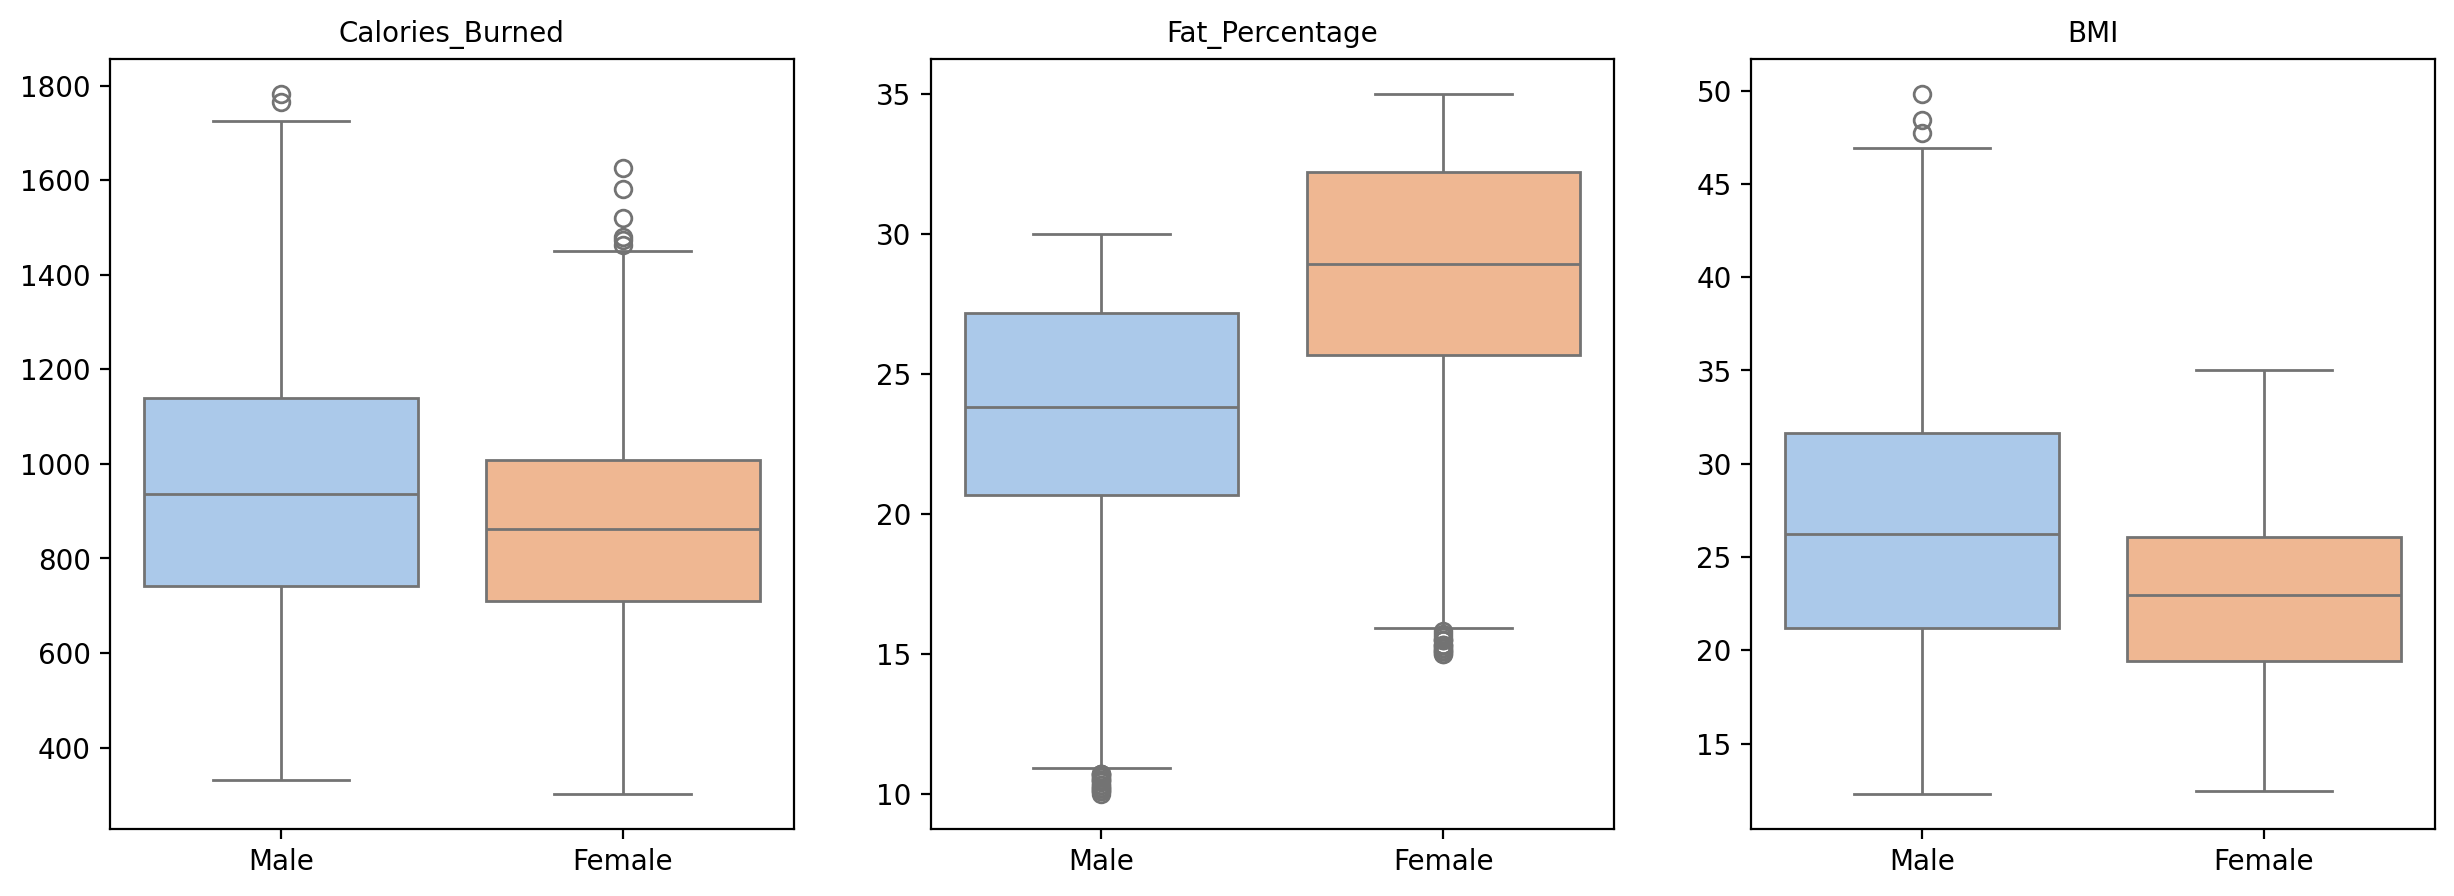

In [261]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# Wczytanie danych

# Wybrane kolumny liczbowe do analizy
selected_columns = ['Calories_Burned', 'Fat_Percentage', 'BMI']

# Parametry siatki wykresów
cols_per_row = 3
fig, axes = plt.subplots(1, len(selected_columns), figsize=(5 * len(selected_columns), 5))

# Upewniamy się, że axes to lista
if len(selected_columns) == 1:
    axes = [axes]

# Tworzenie boxplotów
for ax, col in zip(axes, selected_columns):
    sns.boxplot(
        data=dirty_df,
        x='Gender',
        y=col,
        hue='Gender',
        ax=ax,
        palette='pastel'
    )
    ax.set_title(f"{col}", fontsize=10)
    ax.set_xlabel("")
    ax.set_ylabel("")

## 4.3 Analiza rozkładu danych oraz usuwanie outlierów

### 4.3.1 Liczebność osób wedłóg płci

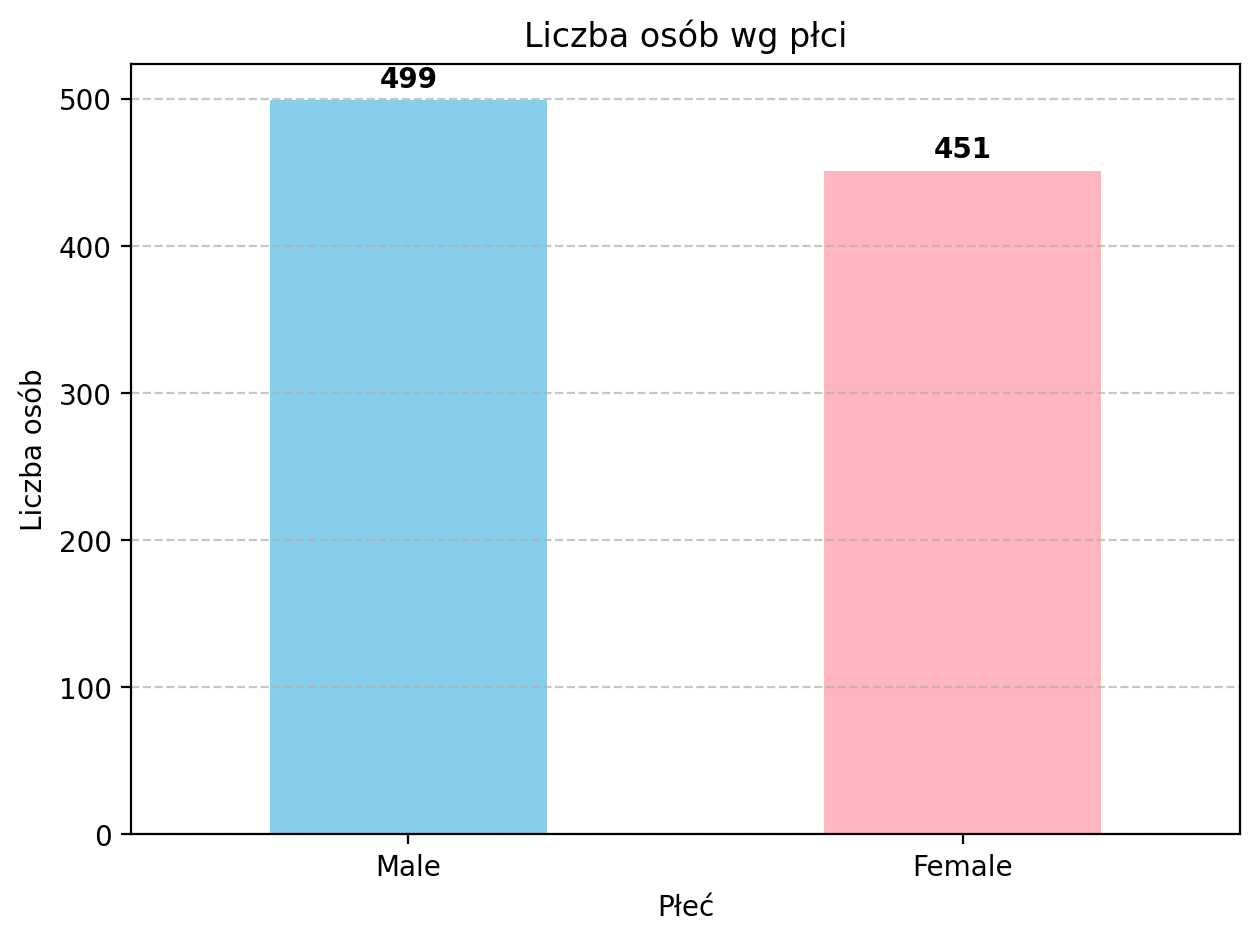

In [262]:
# import matplotlib.pyplot as plt

# Liczenie liczby osób wg płci
gender_counts = dirty_df['Gender'].value_counts()

# Tworzenie wykresu słupkowego
ax = gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])

# Dodanie tytułu i etykiet
plt.title("Liczba osób wg płci")
plt.ylabel("Liczba osób")
plt.xlabel("Płeć")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Dodanie wartości liczbowych nad słupkami
for i, value in enumerate(gender_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 4.3.2 Outliery Fat_Percentage

In [263]:
print("Outliery Fat_Percentage < 15.82 dla kobiet:")
print()
# Ręczna granica dolna z tabeli
lower_bound = 15.82

# Filtruj outliery poniżej dolnej granicy
outliers_low = dirty_df[(dirty_df['Gender'] == 'Female') & (dirty_df['Fat_Percentage'] < lower_bound)]

# Wyświetl wszystkie kolumny
print(outliers_low.to_string(index=False))

Outliery Fat_Percentage < 15.82 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  56 Female         58.0        1.68      168      156           74                      1.59             1116         HIIT            15.5                    2.7                              5                 3 20.55
  57 Female         64.0        1.52      170      129           52                      1.73             1004         HIIT            15.2                    2.7                              5                 3 27.70
  39 Female         61.5        1.69      160      152           63                      1.80             1231       Cardio            15.5                    2.7                              4                 3 21.53
  41 Female         63.4        1.59      162      153           55                

W analizowanym zbiorze zidentyfikowano 16 kobiet z procentową zawartością tkanki tłuszczowej poniżej przyjętej dolnej granicy 15,82%. Wartości te mieszczą się w zakresie 15,0–15,8%, co może wskazywać na bardzo wysoki poziom aktywności fizycznej (HIIT, Strength, Cardio). Są to wartości typowe dla osób regularnie trenujących, jednak dla przeciętnej kobiety mogą oznaczać zbyt niski poziom tłuszczu.

In [264]:
print("Outliery Fat_Percentage < 10.90  dla mezczyzn:")
print()
# Ręczna granica dolna z tabeli
lower_bound = 10.90 

# Filtruj outliery poniżej dolnej granicy
outliers_low = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['Fat_Percentage'] < lower_bound)]

# Wyświetl wszystkie kolumny
print(outliers_low.to_string(index=False))

Outliery Fat_Percentage < 10.90  dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  38   Male         81.4        1.71      187      148           58                      1.52             1237         HIIT            10.2                    3.5                              5                 3 27.84
  30   Male         85.3        1.95      160      155           68                      1.61             1373         Yoga            10.4                    3.5                              5                 3 22.43
  39   Male         80.9        1.80      178      126           59                      1.55             1074       Cardio            10.7                    3.5                              4                 3 24.97
  58   Male         82.2        1.87      171      143           55             

W analizowanym zbiorze zidentyfikowano 19 mężczyzn z procentową zawartością tkanki tłuszczowej poniżej dolnej granicy 10,9%. Wartości te wahają się od 10,0% do 10,7%, co jest charakterystyczne dla osób o wysokiej aktywności fizycznej, często uprawiających intensywne treningi (HIIT, Strength, Cardio, Yoga). Są to wartości niskie, ale jeszcze mieszczące się w granicach możliwych dla mężczyzn o sportowym trybie życia. 

### 4.3.3 Outliery Calories_Burned

In [ ]:
print("Outliery Calories_Burned > 1455.75 dla kobiet:")
print()
# Ręczna granica górna z tabeli
upper_bound = 1455.75

# Filtruj outliery poniżej dolnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Female') & (dirty_df['Calories_Burned'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned > 1455.75 dla kobiet:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  39 Female         60.1        1.79      170      165           63                      1.97             1625       Cardio            15.9                    2.7                              4                 3 18.76
  43 Female         57.3        1.79      175      166           62                      1.98             1479         Yoga            17.8                    2.7                              4                 3 17.88
  21 Female         61.3        1.57      191      152           64                      1.94             1474         HIIT            17.2                    2.7                              4                 3 24.87
  28 Female         55.1        1.79      192      159           67             

W grupie kobiet wykonujących aktywność oznaczoną jako Yoga wykryto wartości Calories_Burned powyżej 1455,75 kcal, dochodzące nawet do 1582 kcal. Są to wartości nietypowe dla jogi, nawet przy długim czasie trwania, i mogą wskazywać na błędną klasyfikację rodzaju treningu lub pomiaru spalonych kalorii.

**Rekordy zostaną usunięte od dalszej analizy**

In [ ]:
# zapisz podejrzane do osobnego dataframe
upper_bound = 1455.75
suspect_calories_female = dirty_df[
    (dirty_df['Gender'] == 'Female') &
    (dirty_df['Calories_Burned'] > upper_bound)
]

**Usunięcie rekordów, gdzie Outliery Calories_Burned > 1455.75 dla kobiet z głównego dataframe**

In [ ]:
dirty_df = dirty_df.drop(suspect_calories_female.index)
dirty_df.shape

(944, 15)

In [ ]:
print("Outliery Calories_Burned > 1733.25 dla mezczyzn:")
print()
# Ręczna granica górna z tabeli
upper_bound = 1733.25

# Filtruj outliery poniżej dolnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['Calories_Burned'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery Calories_Burned > 1733.25 dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
40.0   Male         82.4        1.96      174      169           62                      1.90             1766         HIIT            10.1                    3.5                              5                 3 21.45
50.0   Male         89.8        1.92      199      168           67                      1.93             1783     Strength            10.6                    3.5                              4                 3 24.36


1766 kcal to ekstremalnie wysoka wartość jak na HIIT, przekraczająca możliwości większości osób.
1783 kcal wymagałoby gigantycznego obciążenia, bardzo krótkich przerw i ekstremalnej objętości.
Oba przypadki wskazują na błędne dane.

**Rekordy zostaną usunięte od dalszej analizy**

In [269]:
# zapisz podejrzane do osobnego dataframe
upper_bound = 1733.25
suspect_calories_male = dirty_df[
    (dirty_df['Gender'] == 'Male') &
    (dirty_df['Calories_Burned'] > upper_bound)
]

In [270]:
dirty_df = dirty_df.drop(suspect_calories_male.index)
dirty_df.shape

(942, 15)

### 4.3.5 Outliery BMI

In [271]:
print("Outliery BMI > 47.35 dla mezczyzn:")
print()
# Ręczna granica górna z tabeli
upper_bound = 47.35

# Filtruj outliery poniżej dolnej granicy
outliers_high = dirty_df[(dirty_df['Gender'] == 'Male') & (dirty_df['BMI'] > upper_bound)]

# Wyświetl wszystkie kolumny
print(outliers_high.to_string(index=False))

Outliery BMI > 47.35 dla mezczyzn:

 Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level   BMI
  57   Male        126.8        1.63      161      133           73                      0.96              632         Yoga            20.8                    2.1                              2                 1 47.72
  48   Male        129.2        1.61      193      167           62                      1.06              876         Yoga            21.4                    2.9                              4                 2 49.84
  35   Male        127.1        1.62      187      128           69                      1.02              718     Strength            23.3                    3.4                              4                 2 48.43


MI > 47 oznacza skrajną otyłość III stopnia. Te wartości są skrajne ale teoretycznie możliwe.

**Oczyszczony zbiór Data Frame po usunięciu indeksów - do dalszej analizy:**

In [278]:
# clean_data = dirty_df.copy()
clean_data = dirty_df.copy().reset_index(drop=True)
clean_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,39,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,Strength,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39


In [279]:
clean_data.shape

(942, 15)

In [282]:
# clean_data.isna().sum()

## 5 Histogramy rozkładów cech wg płci na oczyszczonym zbiorze danych clean_data

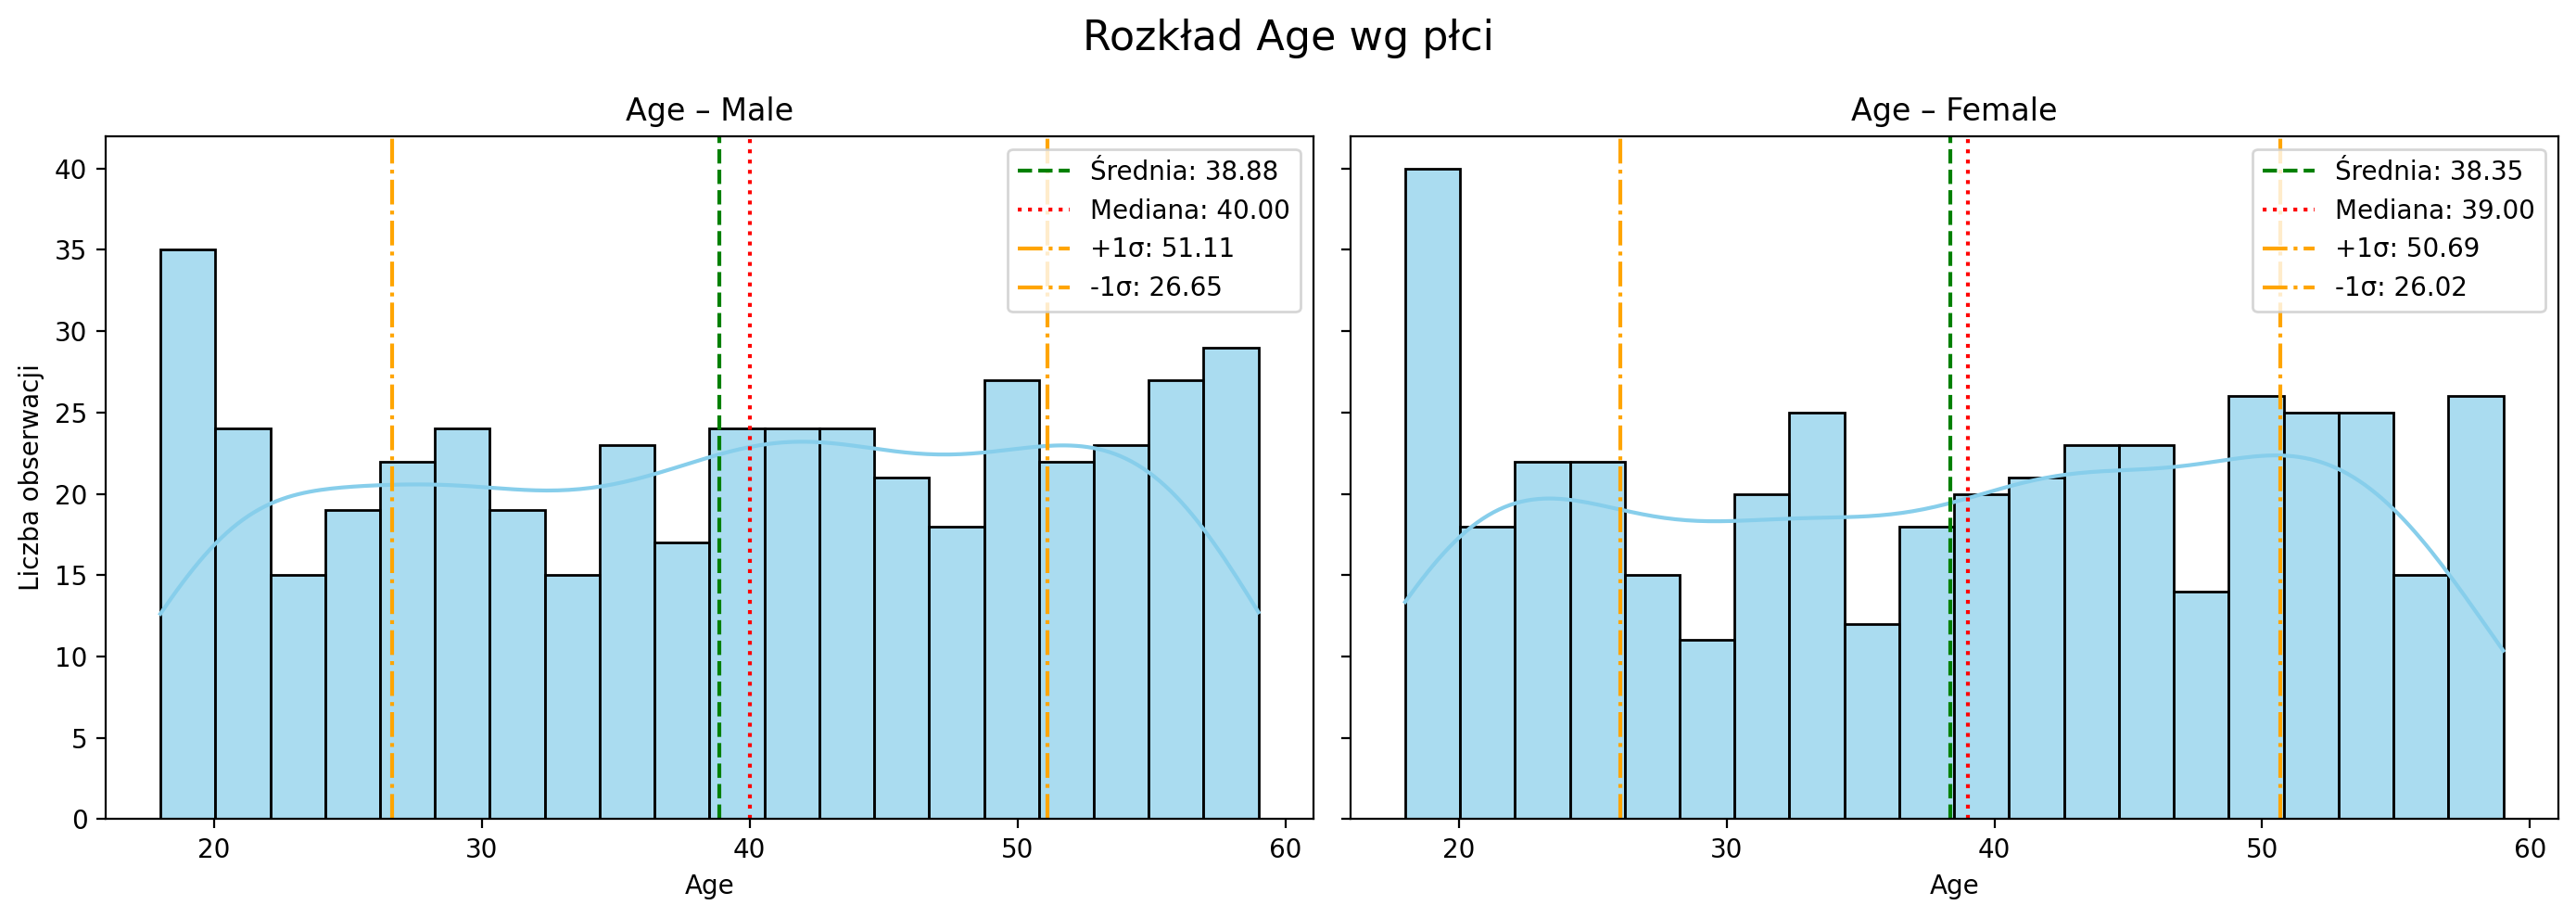

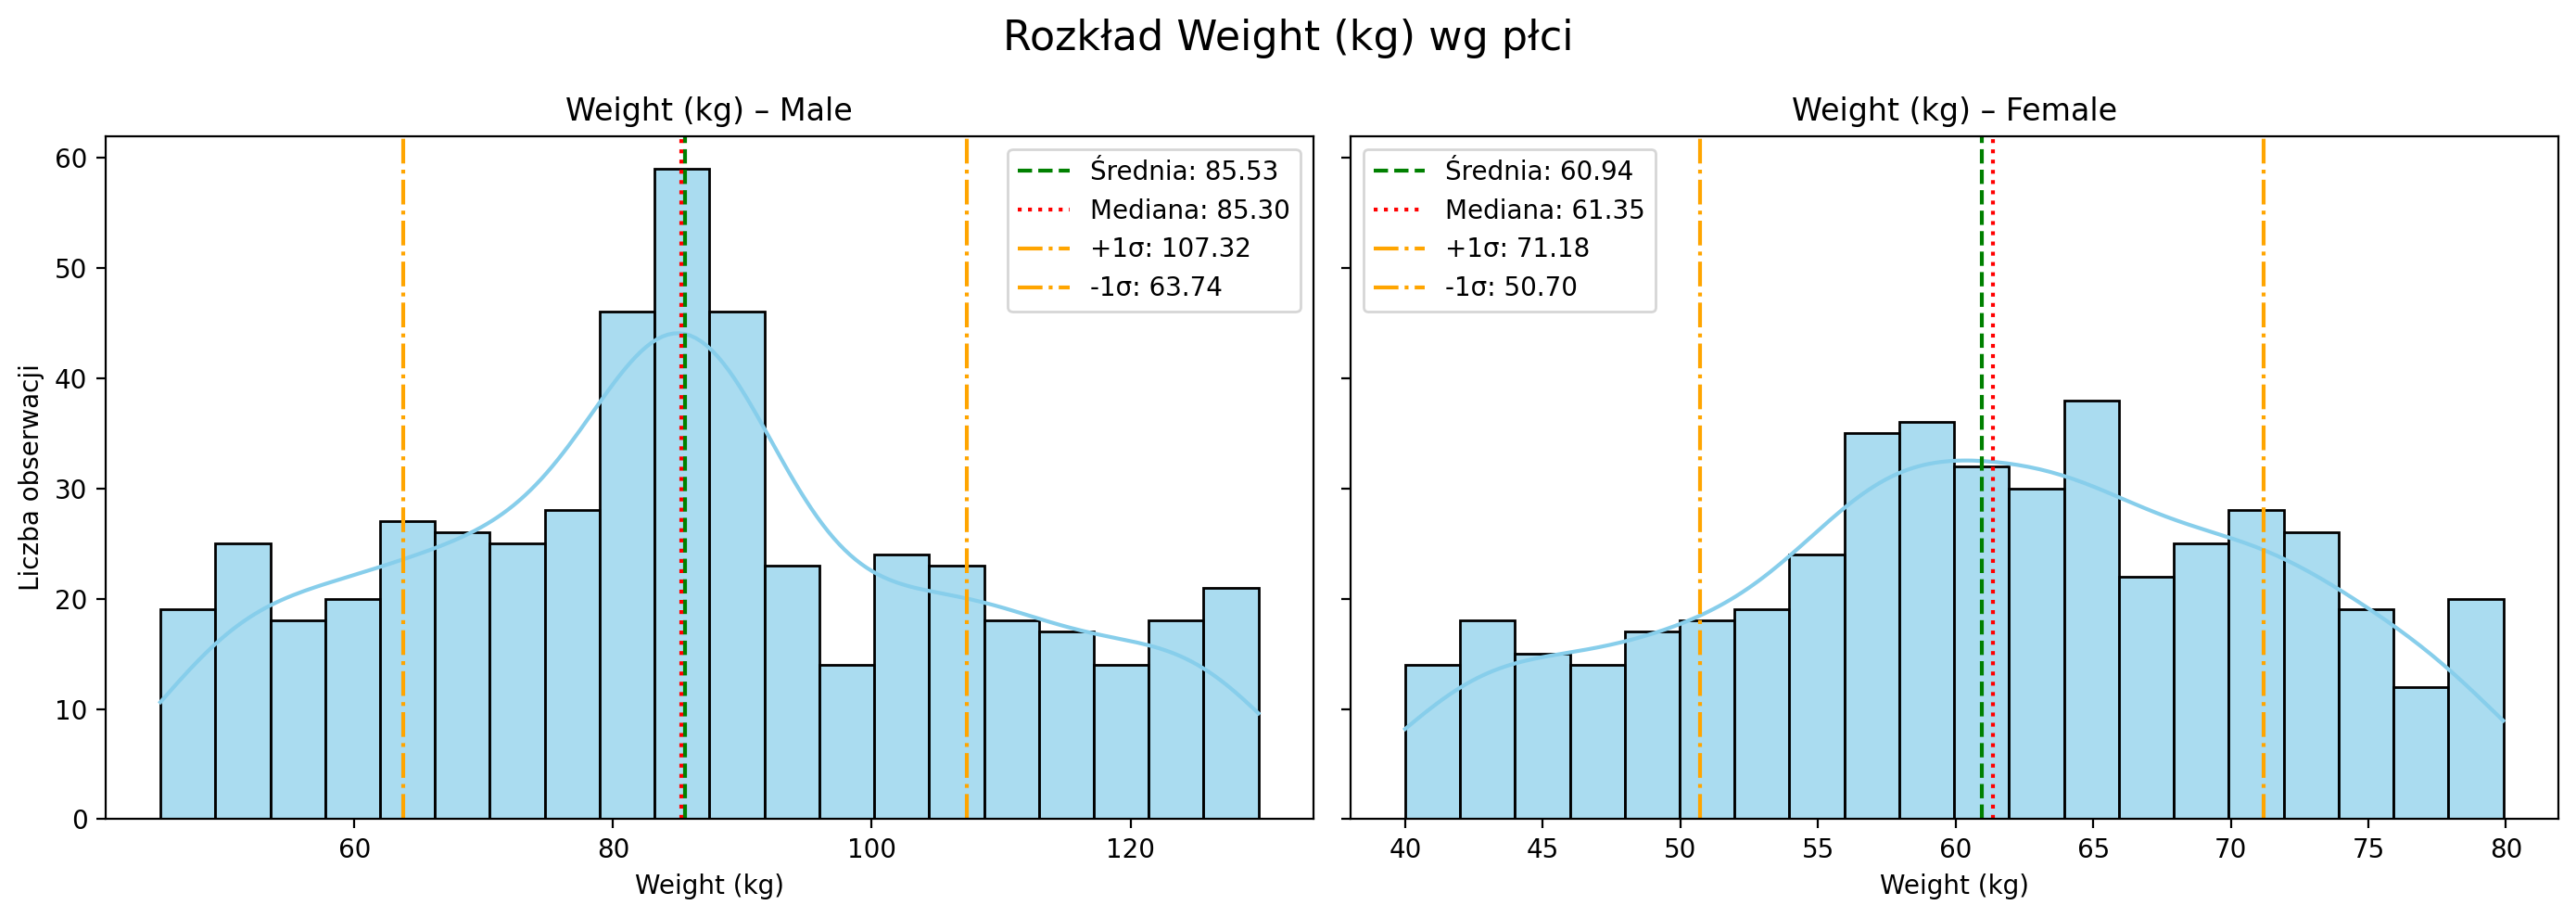

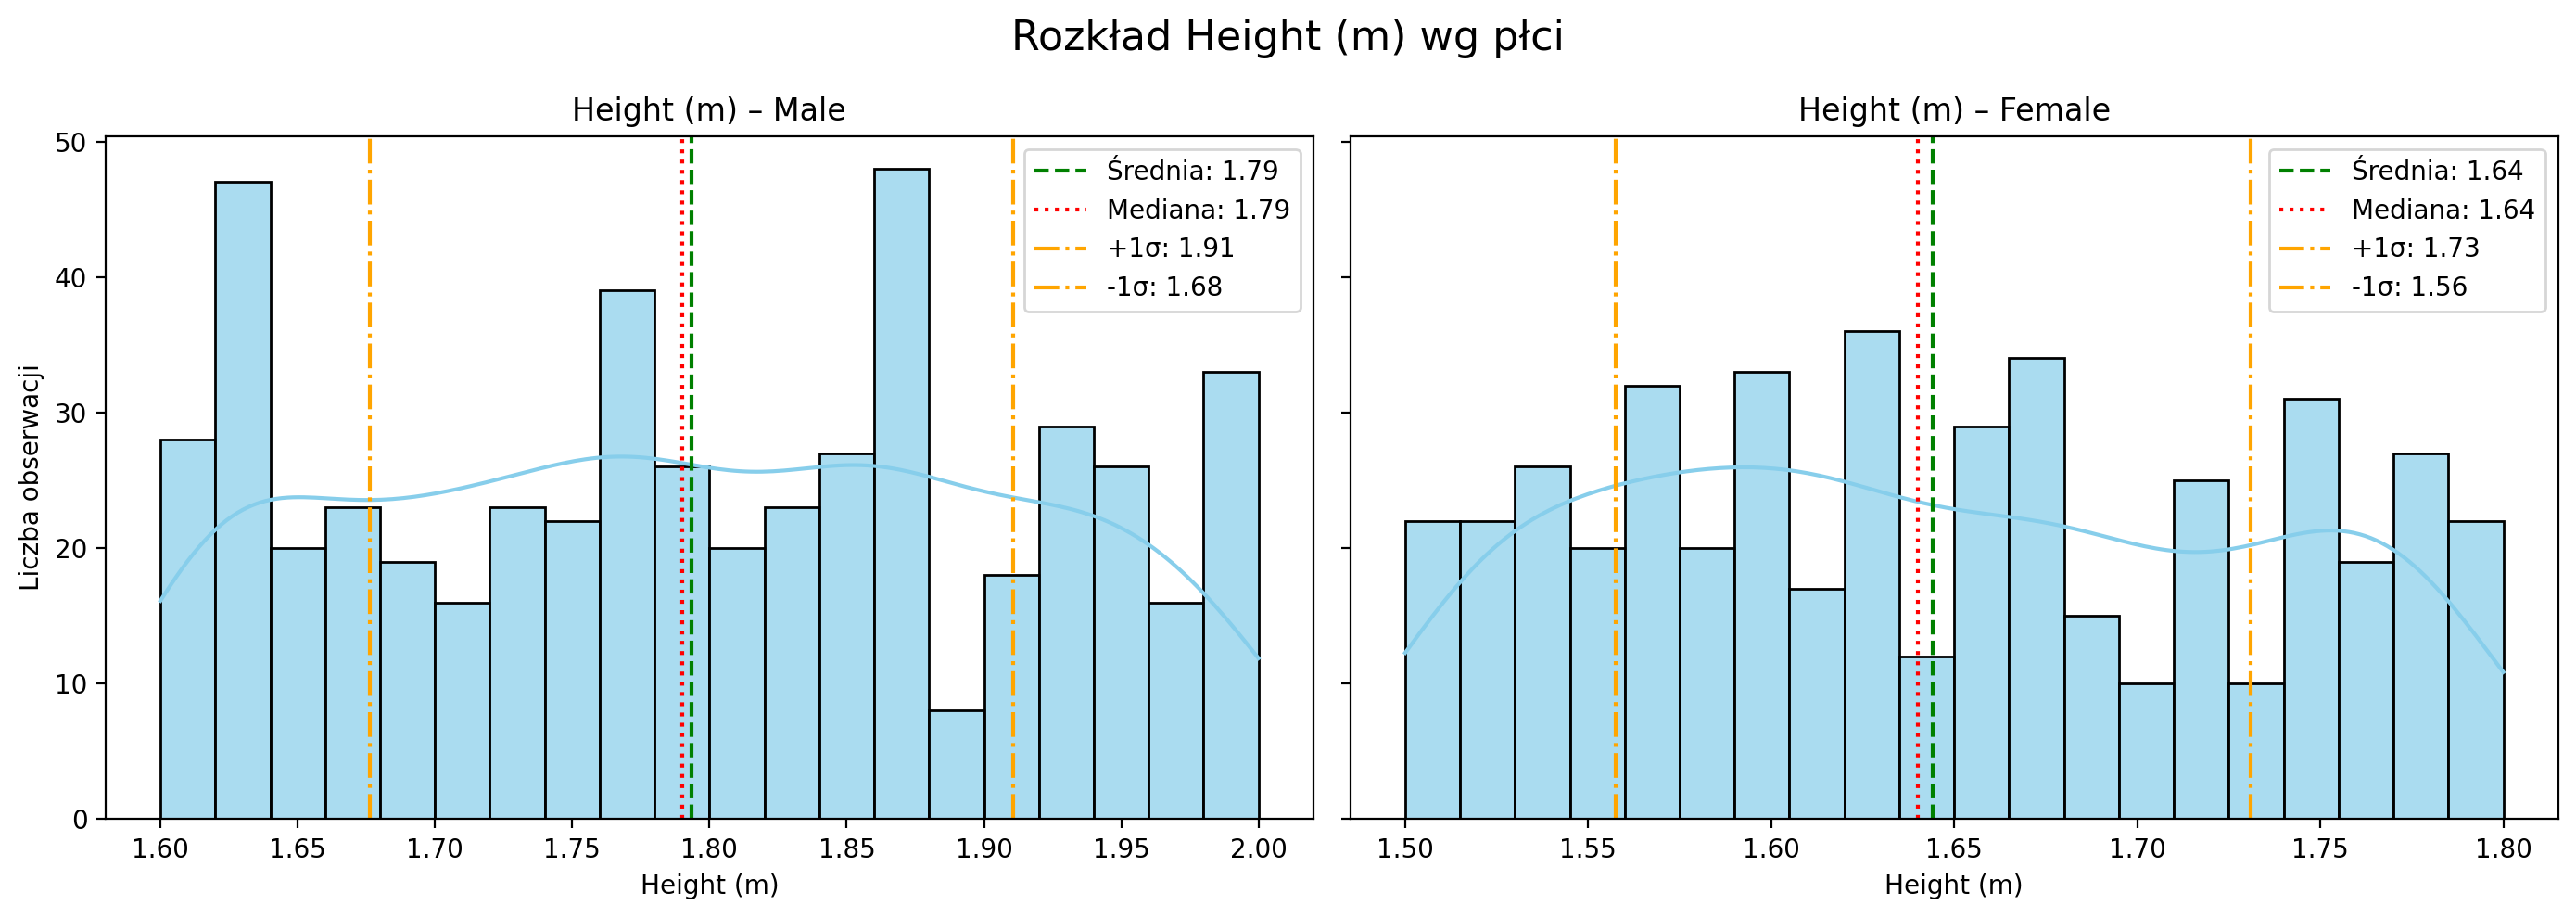

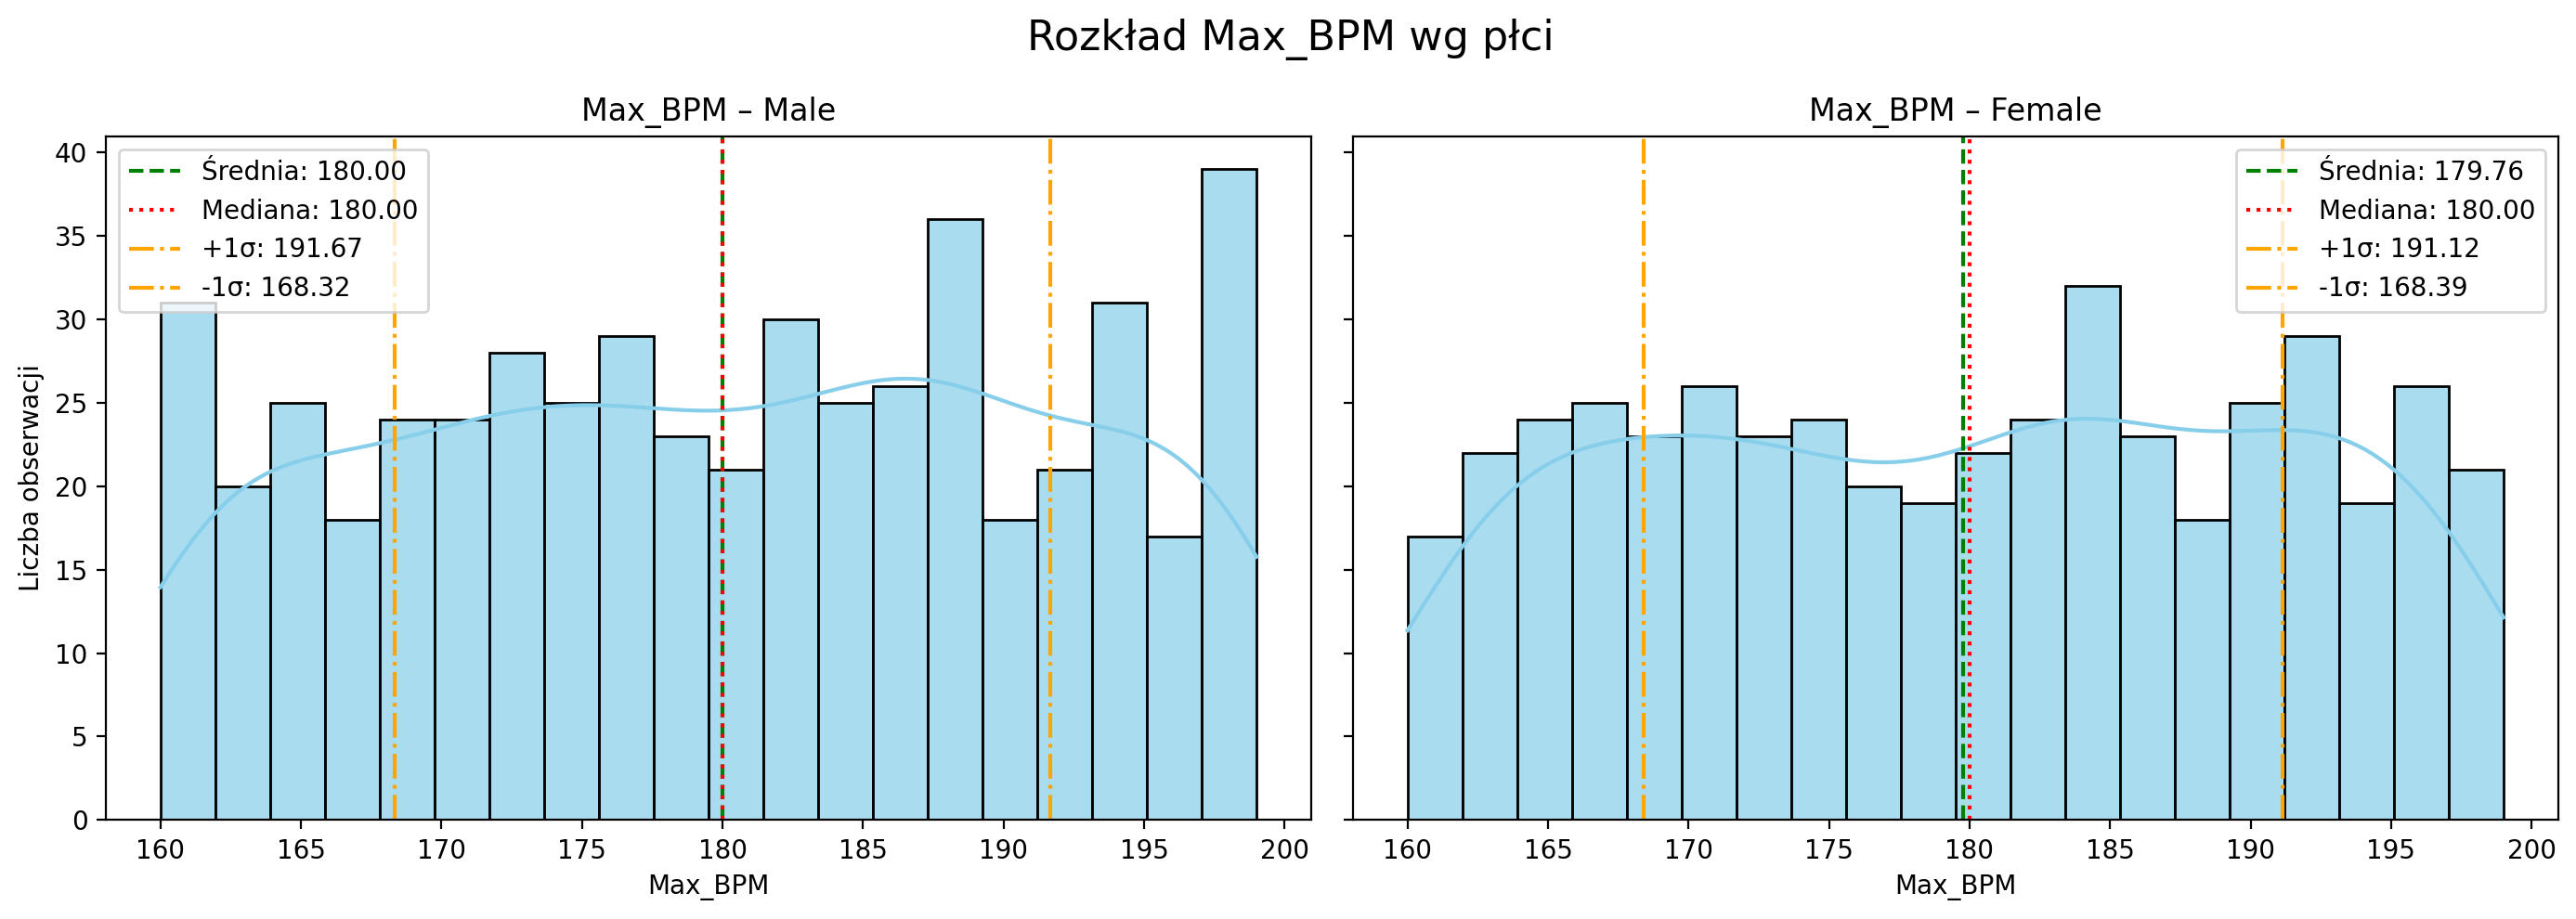

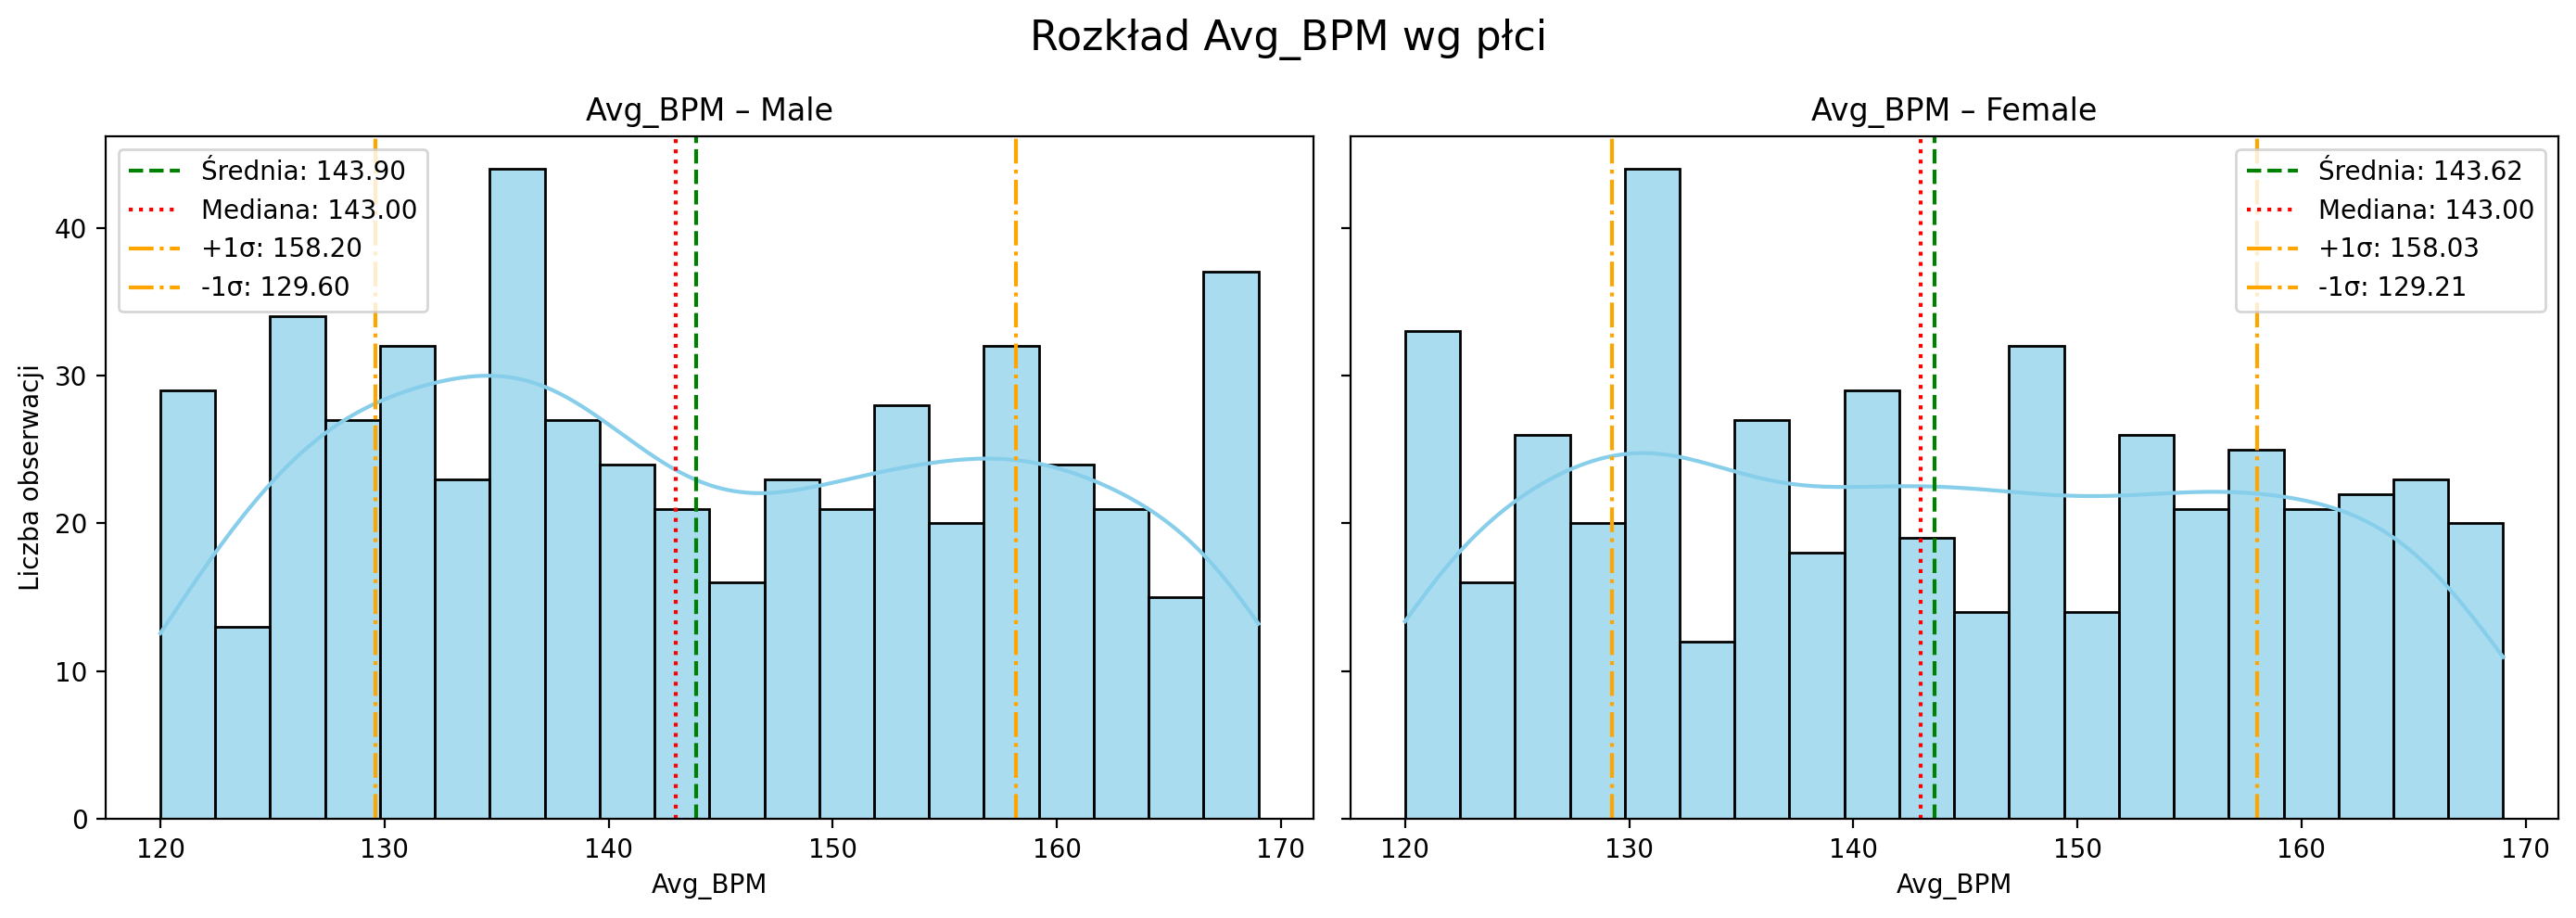

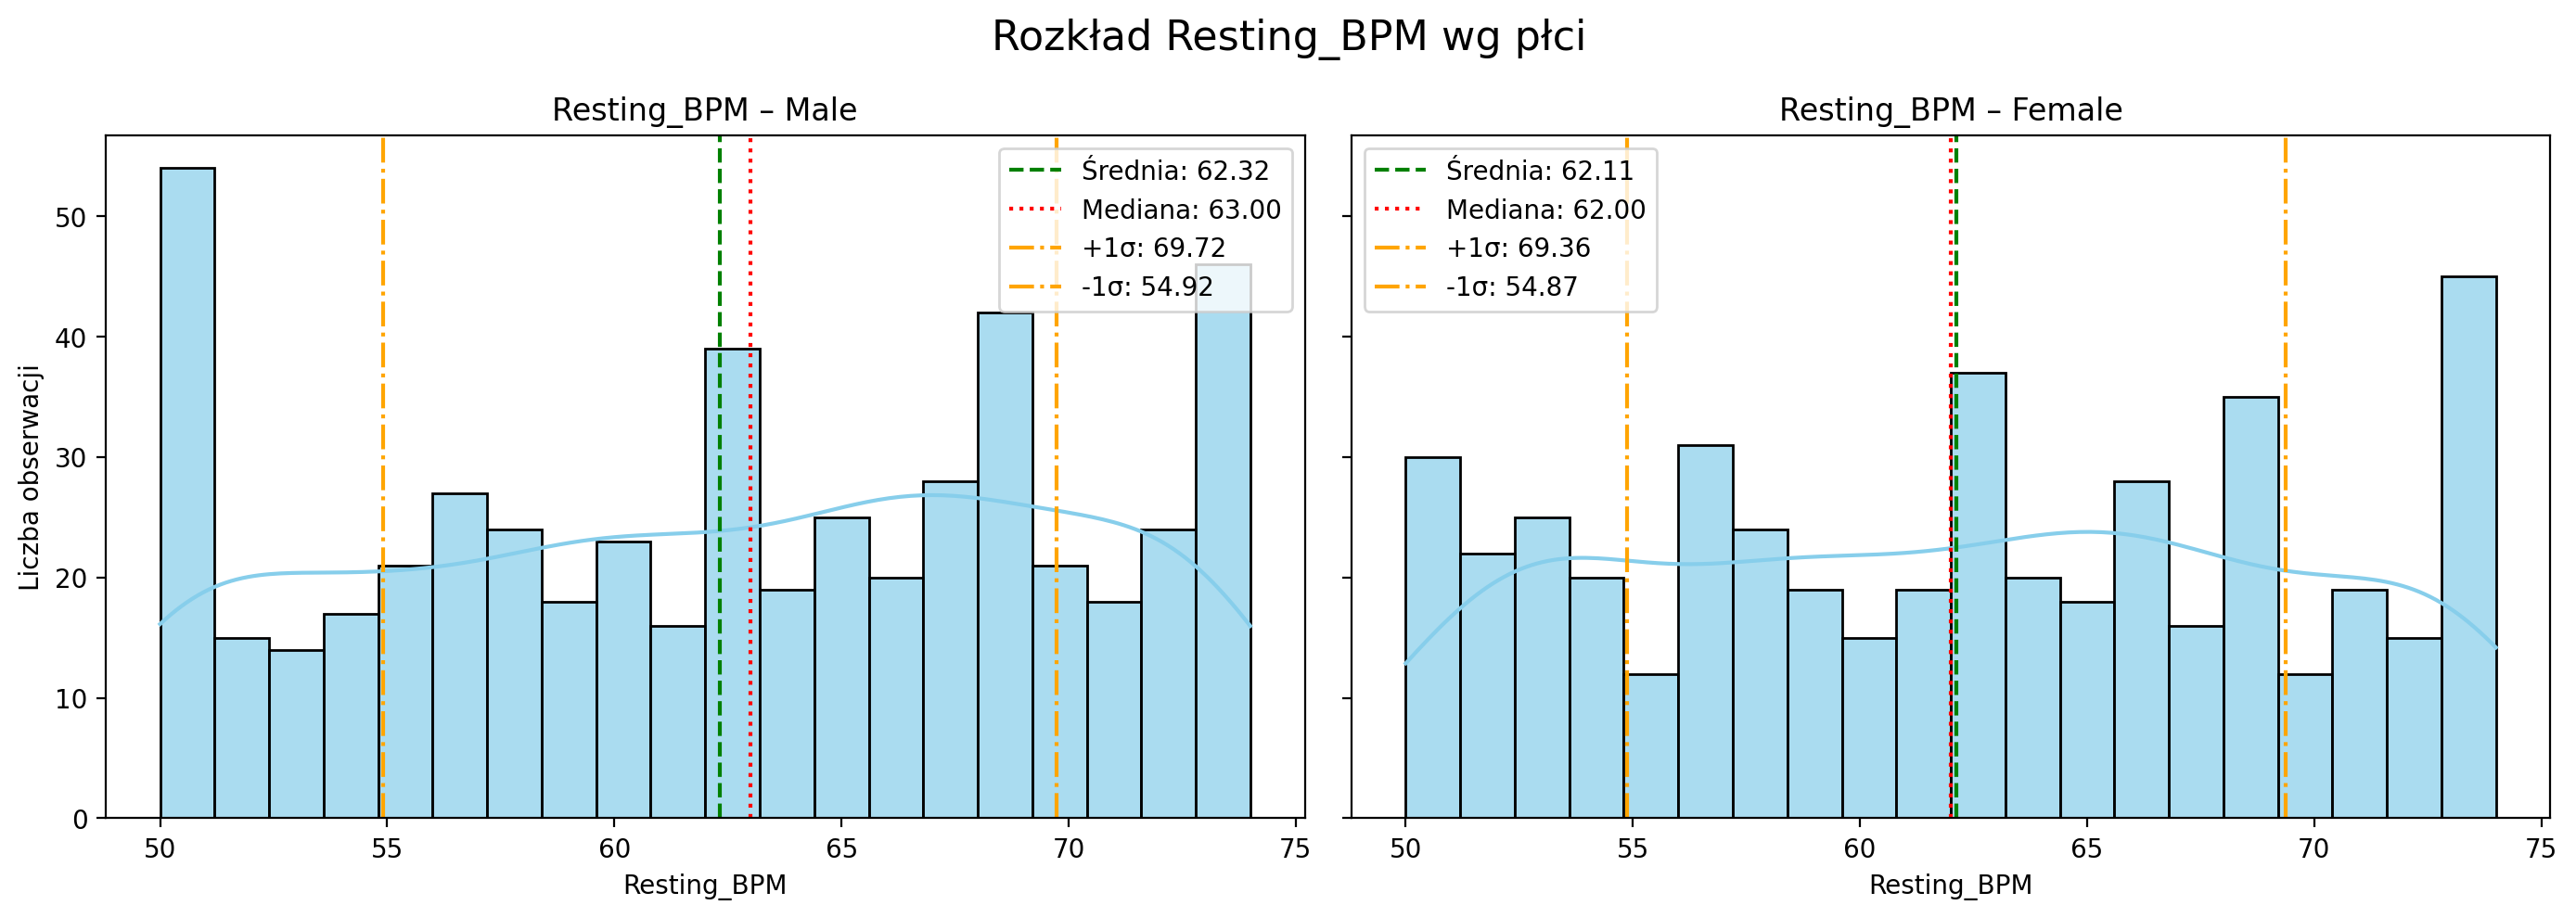

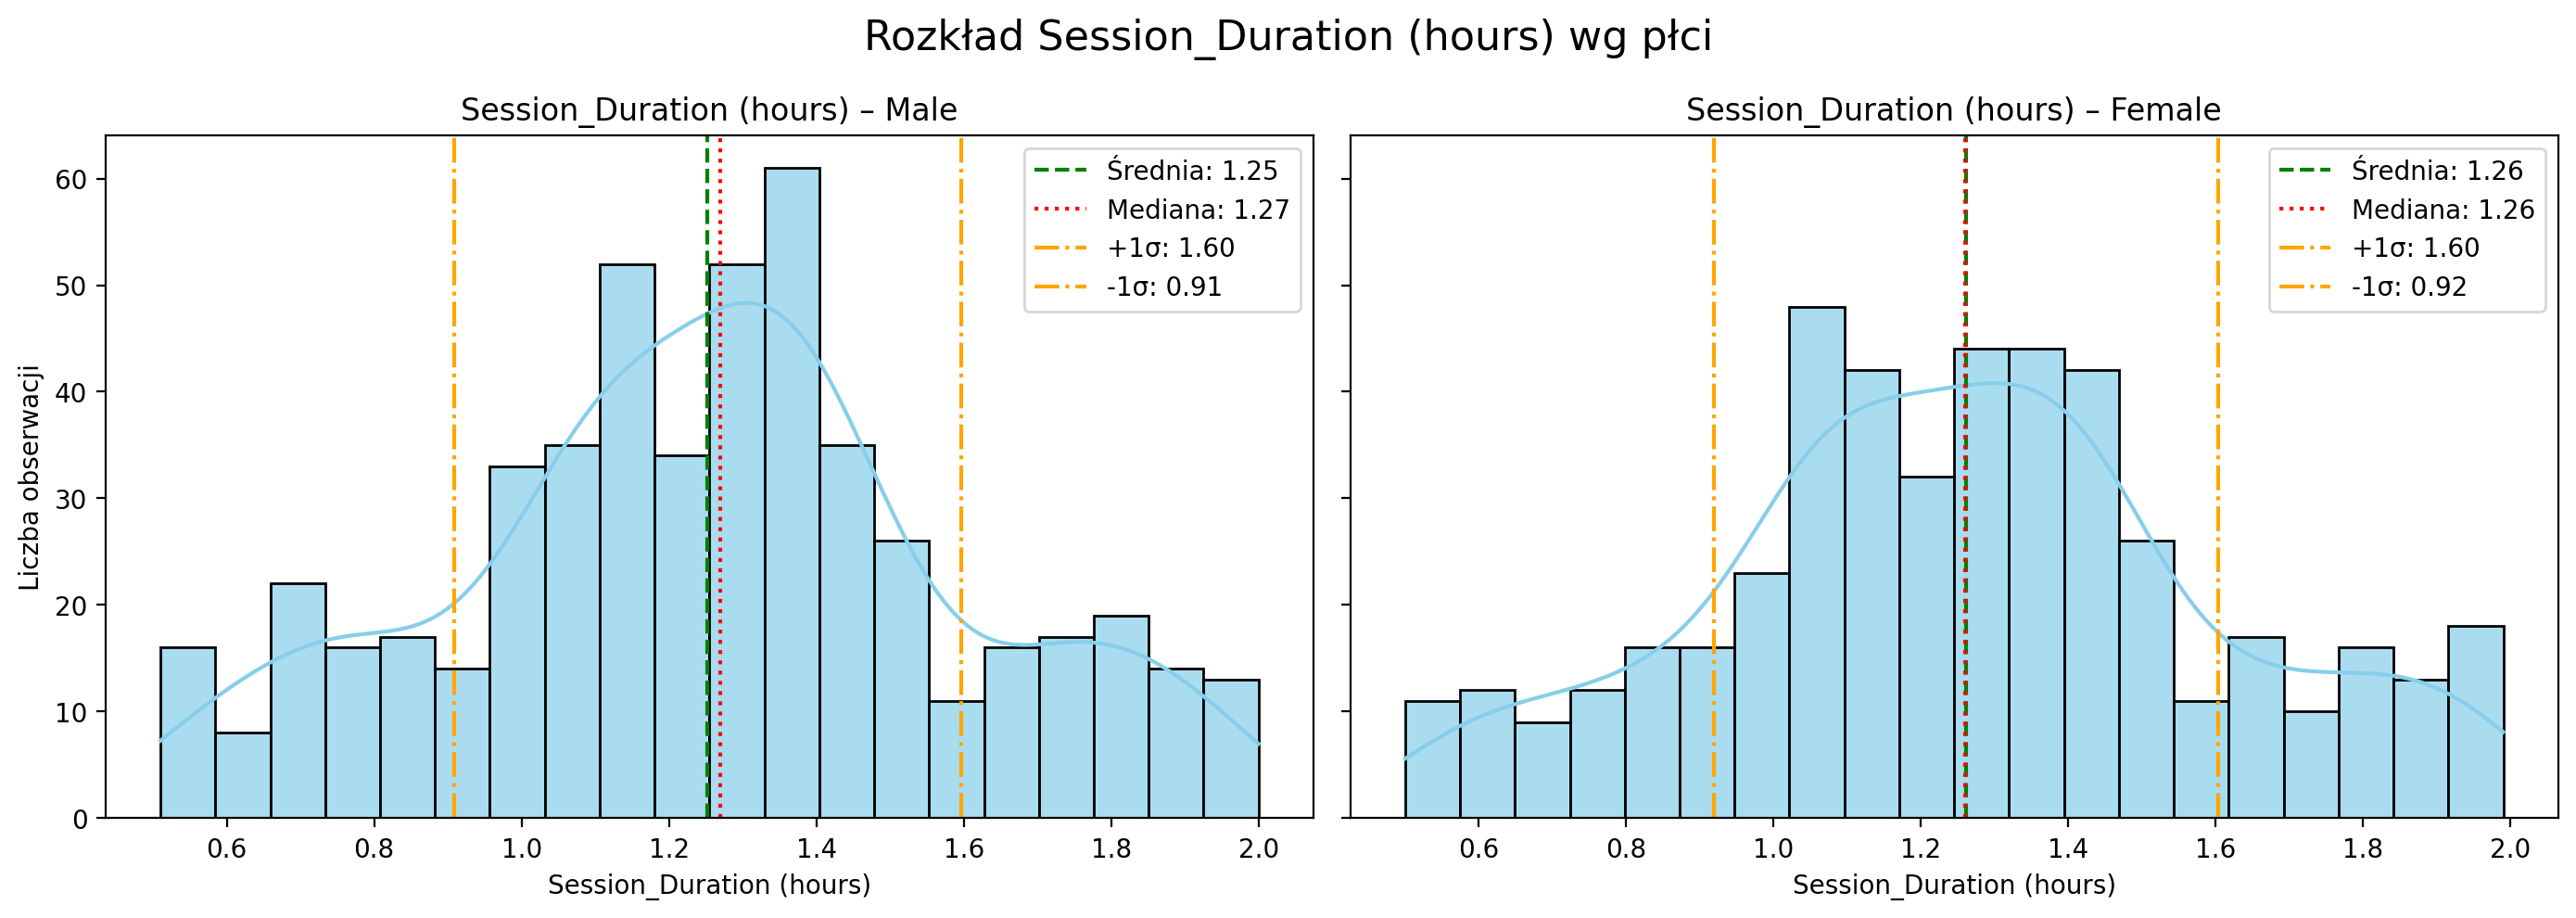

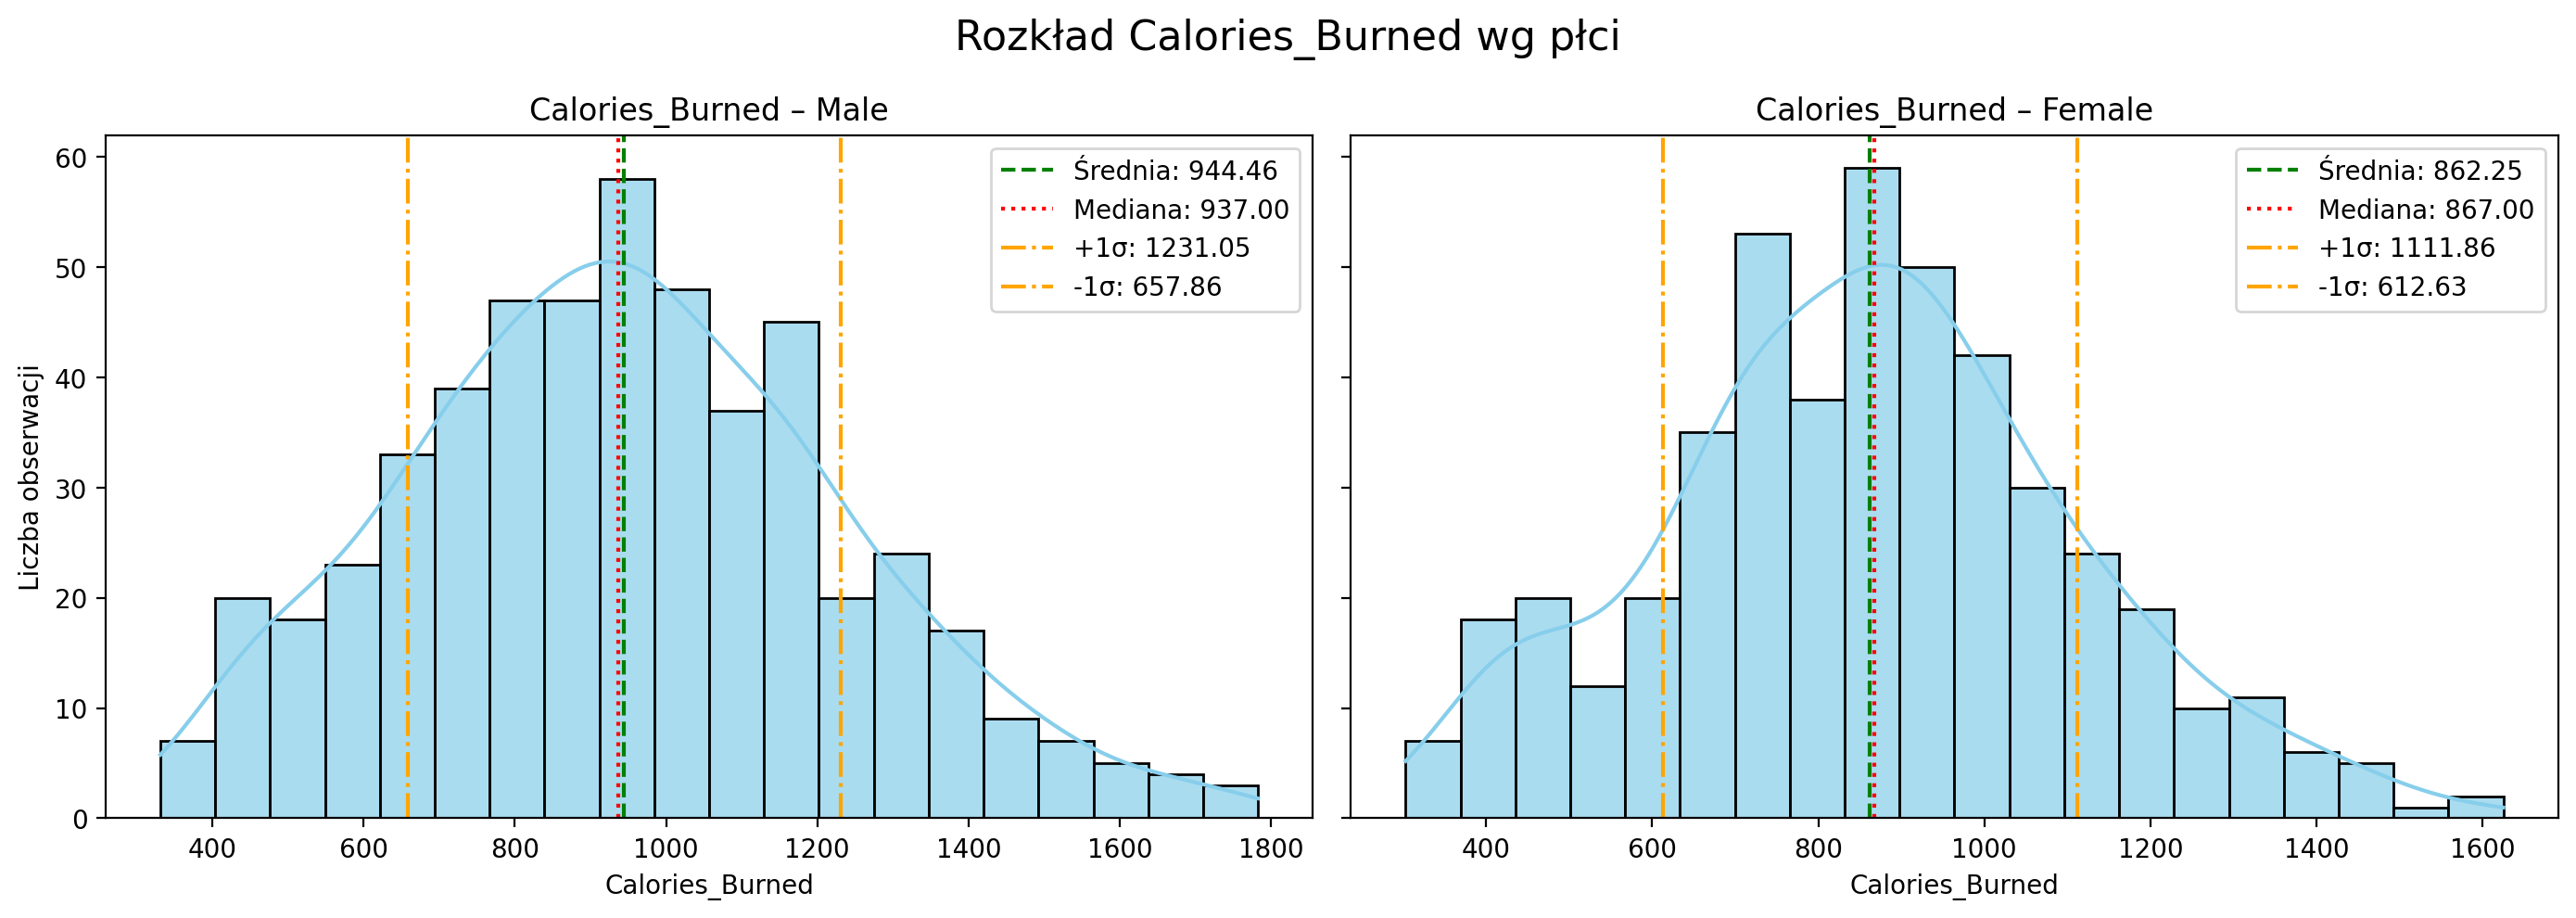

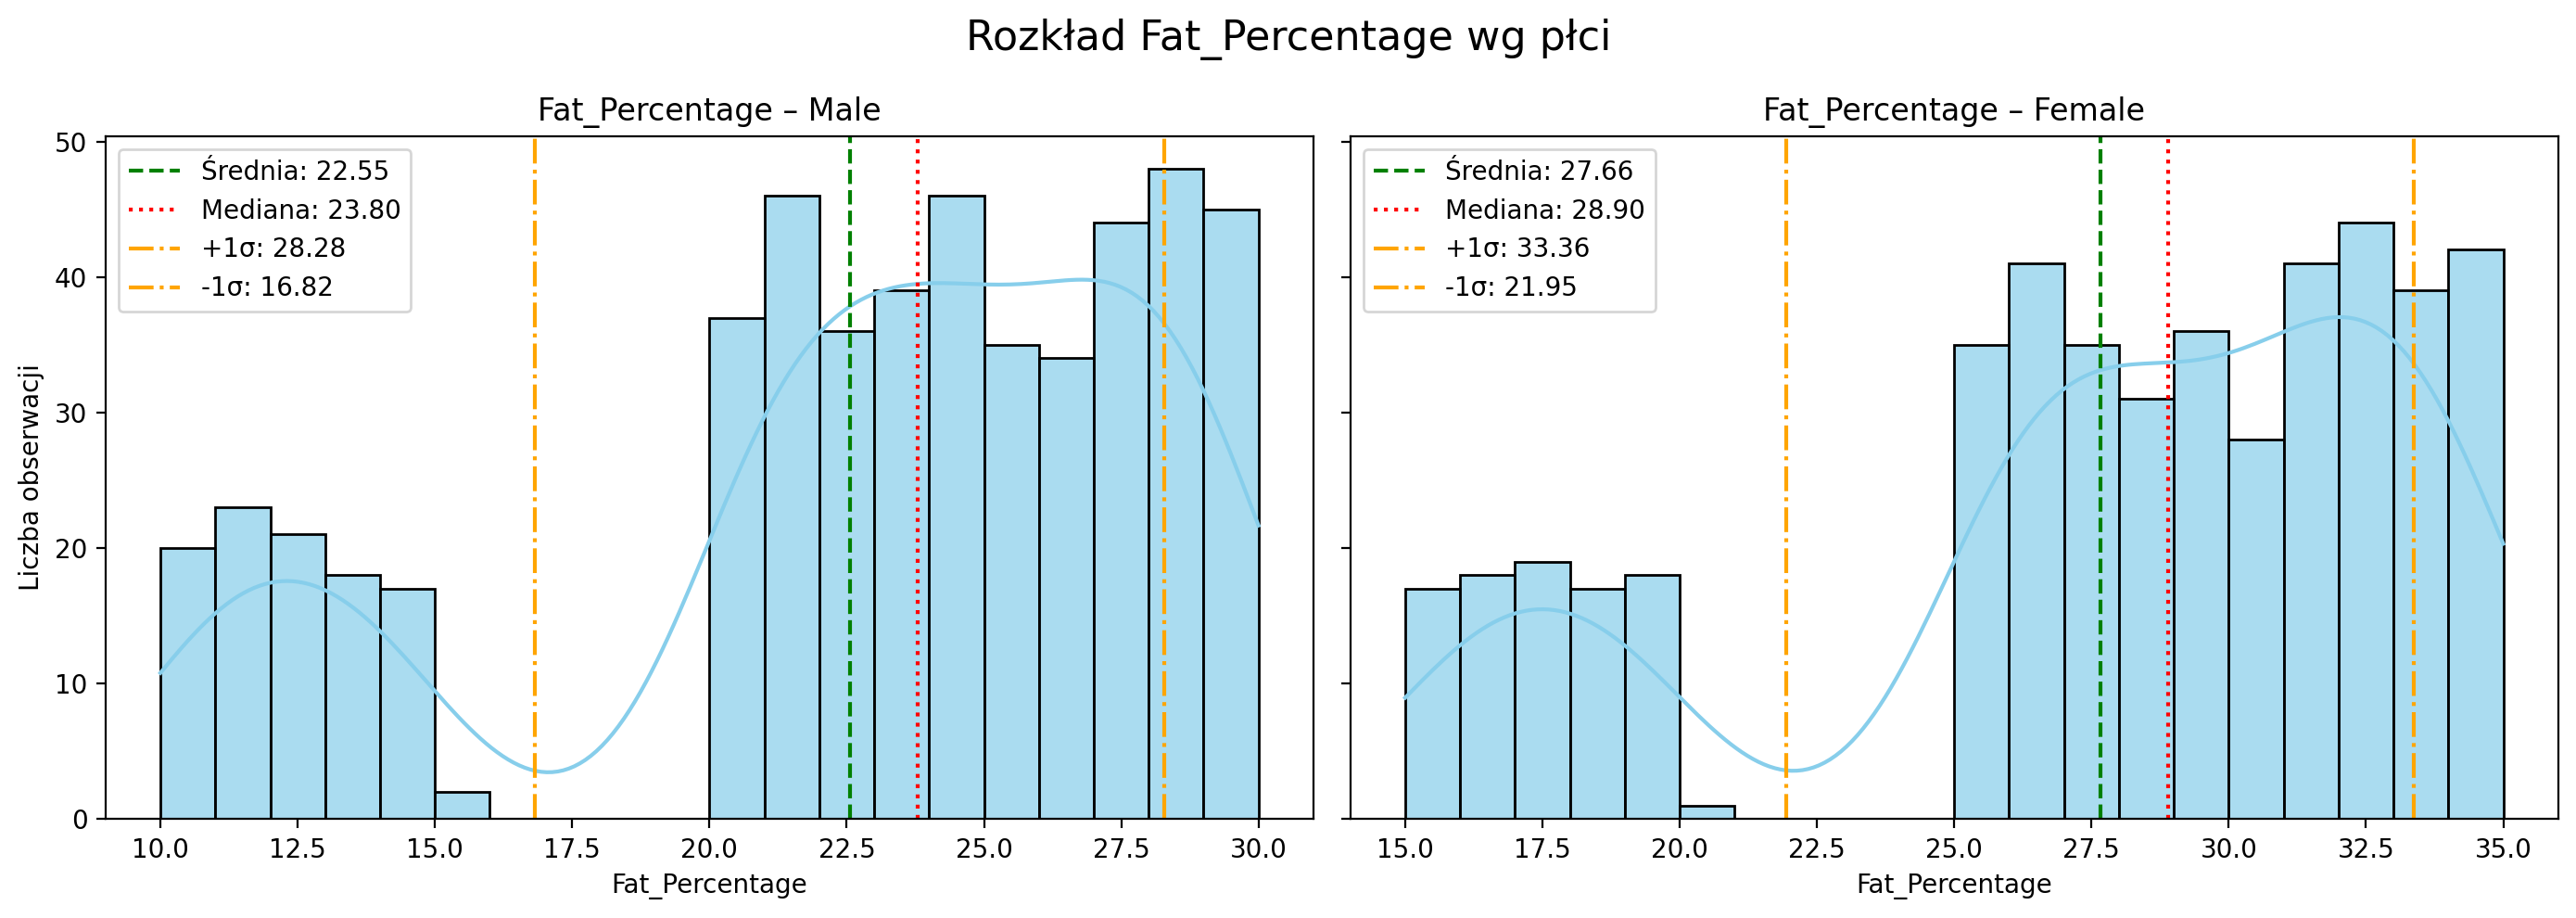

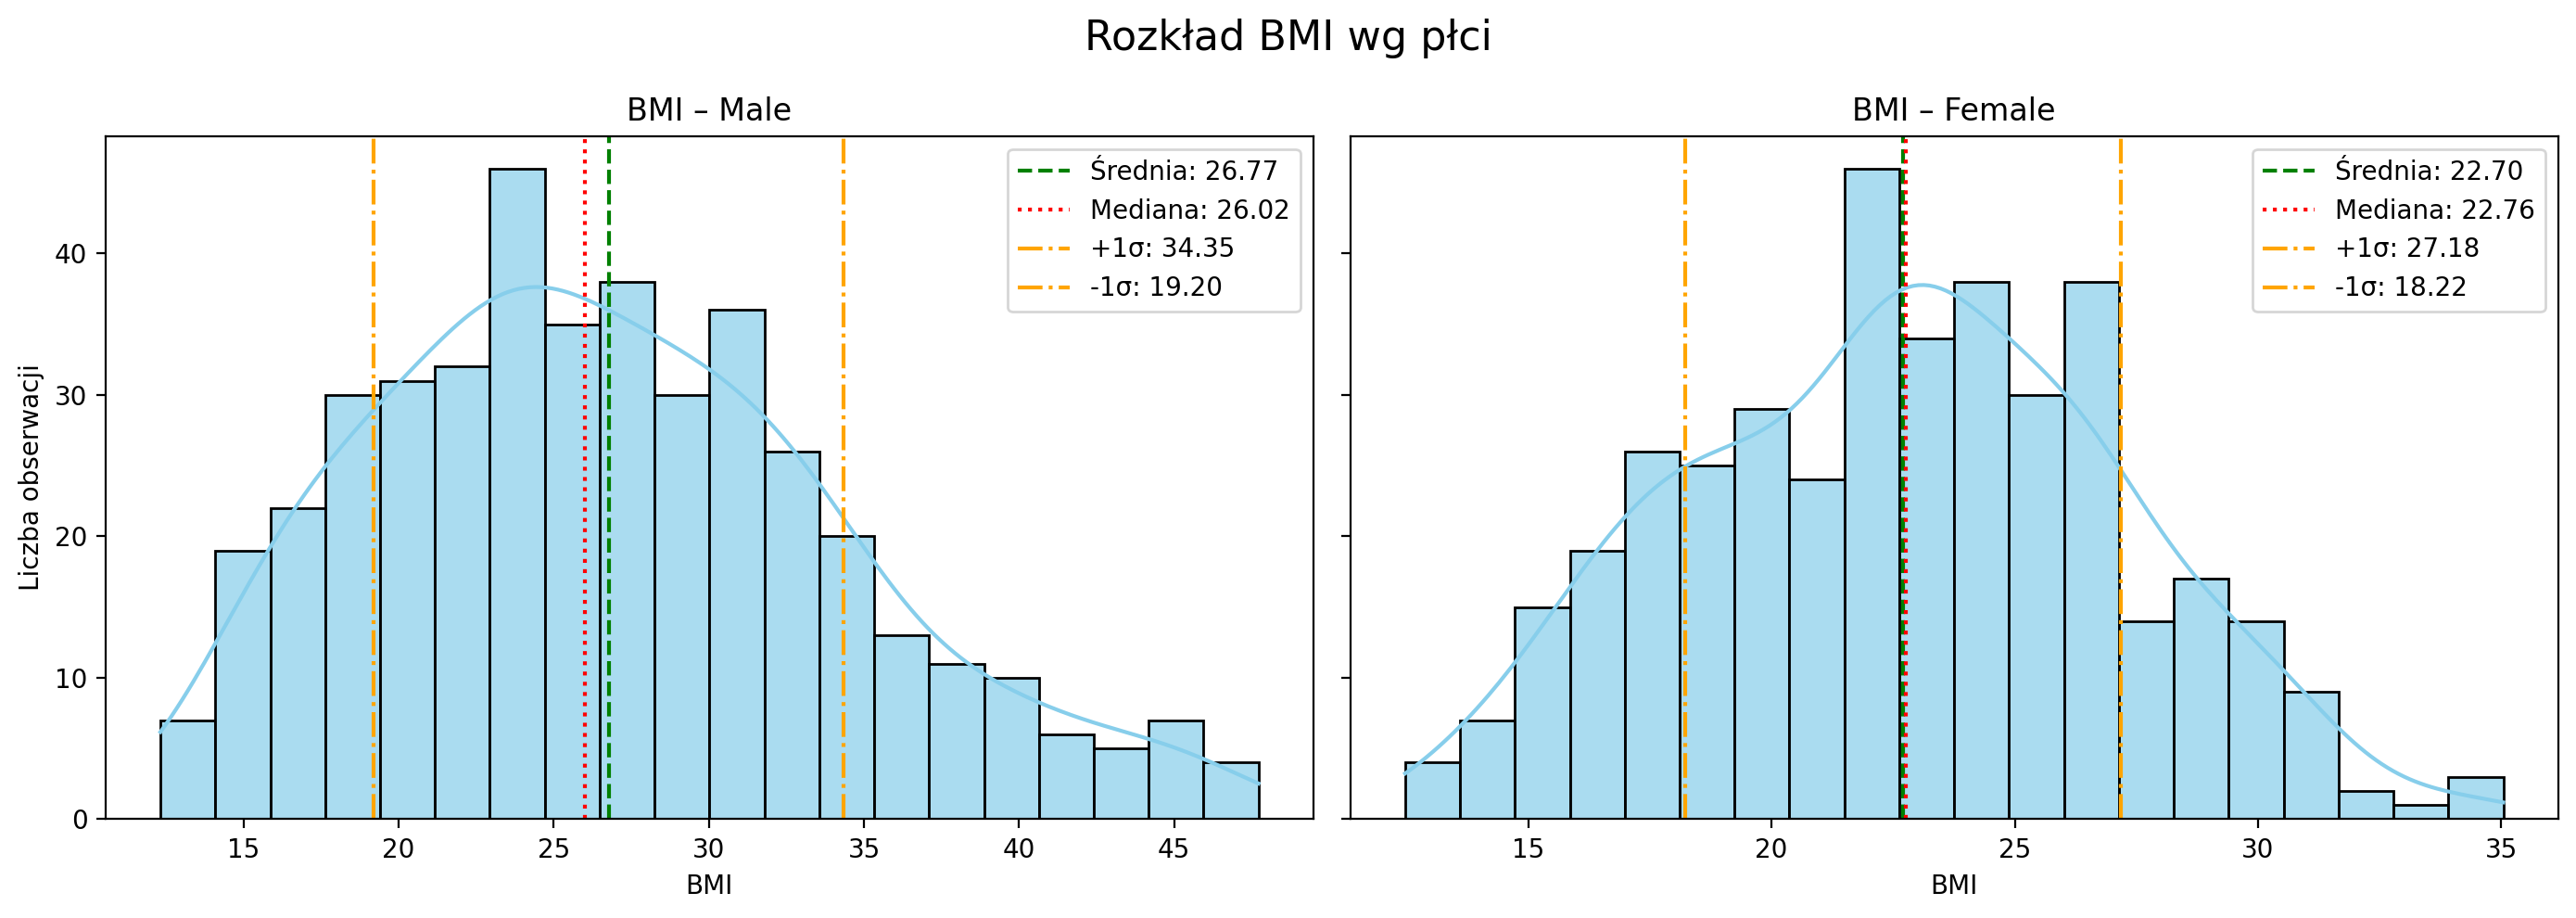

In [283]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Kolumny do pominięcia
excluded_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level']

# Wybór kolumn numerycznych z pominięciem wybranych cech
df_out = clean_data.select_dtypes(include='number').drop(columns=excluded_columns, errors='ignore')

# Funkcja tworząca wykresy obok siebie dla jednej cechy
def plot_gender_distribution(data, column):
    genders = ['Male', 'Female']
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    for i, gender in enumerate(genders):
        subdata = data[data['Gender'] == gender][column].dropna()
        mean_val = subdata.mean()
        median_val = subdata.median()
        std_val = subdata.std()

        sns.histplot(subdata, kde=True, color='skyblue', bins=20, alpha=0.7, ax=axes[i])
        axes[i].axvline(mean_val, linestyle='dashed', color='green', label=f'Średnia: {mean_val:.2f}')
        axes[i].axvline(median_val, linestyle='dotted', color='red', label=f'Mediana: {median_val:.2f}')
        axes[i].axvline(mean_val + std_val, linestyle='dashdot', color='orange', label=f'+1σ: {(mean_val + std_val):.2f}')
        axes[i].axvline(mean_val - std_val, linestyle='dashdot', color='orange', label=f'-1σ: {(mean_val - std_val):.2f}')
        axes[i].set_title(f"{column} – {gender}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Liczba obserwacji")
        axes[i].legend()

    plt.suptitle(f"Rozkład {column} wg płci", fontsize=16)
    plt.tight_layout()
    plt.show()

# Pętla generująca wykresy dla każdej wybranej kolumny numerycznej
for col in df_out.columns:
    plot_gender_distribution(df, col)


In [284]:
# import plotly.express as px

included_columns = ['Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'Fat_Percentage']

for col in included_columns:
    if col in df.columns:
        fig = px.histogram(
            clean_data,
            x=col,
            color='Gender',  # rozdzielnie dla Male i Female
            barmode='overlay',  # słupki nakładają się
            nbins=20,  # można dopasować
            title=f"Histogram rozkładu {col} wg płci",
        )
        fig.update_layout(bargap=0.2)
        fig.show()

WNIOSKI:
...

# 6. CDN ....... PO przygotowaniu danych do analiz

### to a moze cos innego

**Celem analizy** jest **identyfikacja wzorców zachowań i zależności** pomiędzy cechami fizycznymi, demograficznymi oraz parametrami treningowymi użytkowników siłowni. W szczególności analiza ma na celu odpowiedź na następujące pytania:
- Czy bardziej doświadczeni użytkownicy mają niższe tętno spoczynkowe?
- Co najbardziej wpływa na liczbę spalanych kalorii?
- Czy kobiety częściej wybierają jogę?
- Czy picie większej ilości wody oznacza dłuższy trening?
- Jakie są typowe profile użytkowników siłowni – i czym się różnią?

**Czysty Data Frame do dalszych analiz to: clean_data** !!!

In [287]:
clean_data

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,39,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883,Strength,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,24,Male,87.1,1.74,187,158,67,1.57,1364,Strength,10.0,3.5,4,3,28.77
938,25,Male,66.6,1.61,184,166,56,1.38,1260,Strength,25.0,3.0,2,1,25.69
939,39,Female,60.4,1.76,194,120,53,1.72,929,Cardio,18.8,2.7,5,3,19.50
940,32,Male,126.4,1.83,198,146,62,1.10,883,Strength,28.2,2.1,3,2,37.74


Wizualizacje
*4-5 wykresów przedstawiających określone wzorce lub cechy, które chcesz podkreślić. Każdej wizualizacji powinien towarzyszyć krótki (1-2 zdania) opis tego, co według Ciebie pokazuje.*

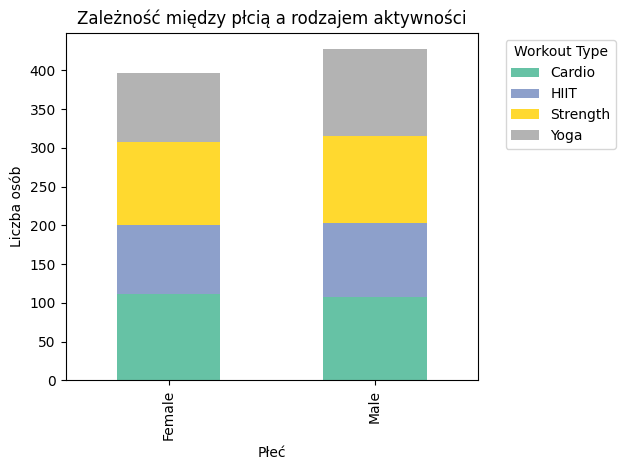

In [10]:
import matplotlib.pyplot as plt

# Tabela zależności
ct = pd.crosstab(df_silownia['Gender'], df_silownia['Workout_Type'])

# Wykres skumulowany
ct.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Zależność między płcią a rodzajem aktywności')
plt.xlabel('Płeć')
plt.ylabel('Liczba osób')
plt.legend(title='Workout Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Interpretacja: Kobiety częściej wybierają cardio, a mężczyźni siłownię i treningi mieszane oraz jogę. Jednak rónice są niewielkie.

Text(45.11413975694444, 0.5, 'Liczba spalonych kalorii')

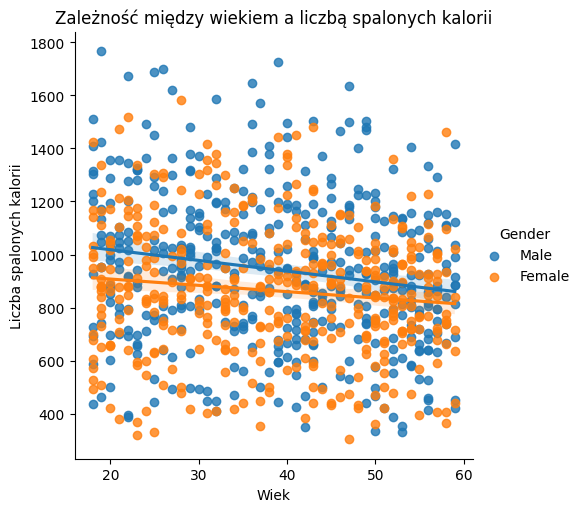

In [11]:
# Czy wiek wpływa na liczbę spalonych kalorii?

sns.lmplot(data=df_silownia, x='Age', y='Calories_Burned', hue='Gender')
plt.title('Zależność między wiekiem a liczbą spalonych kalorii')
plt.xlabel('Wiek')
plt.ylabel('Liczba spalonych kalorii')

Interpretacja: Wraz z wiekiem można zauważyć spadek intensywności spalania kalorii. U kobiet wydaje się być delikatniejszy, u męczyzn rónica jest większa, ale nadal nie drastyczna.

Text(43.190944444444426, 0.5, 'Średnie tętno (BPM)')

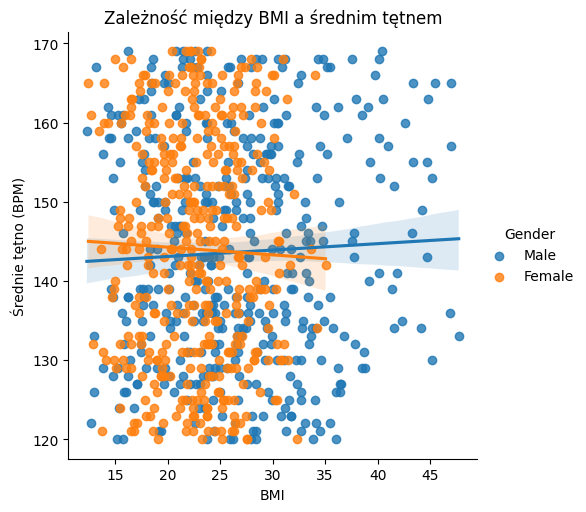

In [12]:
# Czy BMI wpływa na średnie tętno?

sns.lmplot(data=df_silownia, x='BMI', y='Avg_BPM', hue='Gender')
plt.title('Zależność między BMI a średnim tętnem')
plt.xlabel('BMI')
plt.ylabel('Średnie tętno (BPM)')

Interpretacja: Widać, że u męzczyzn, wraz ze wzrostem BMI średnie tętno rośnie, co może sugerować większe obciążenie organizmu. U kobiet sytuacja jest odwrotna. Moze im mają większe BMI, tym mniej intensywne treningi wykoują.

/var/folders/mv/gl_0swbd1d7b76j07453s1n80000gn/T/ipykernel_17248/3344823215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')


Text(0.5, 0, 'Poziom doświadczenia')

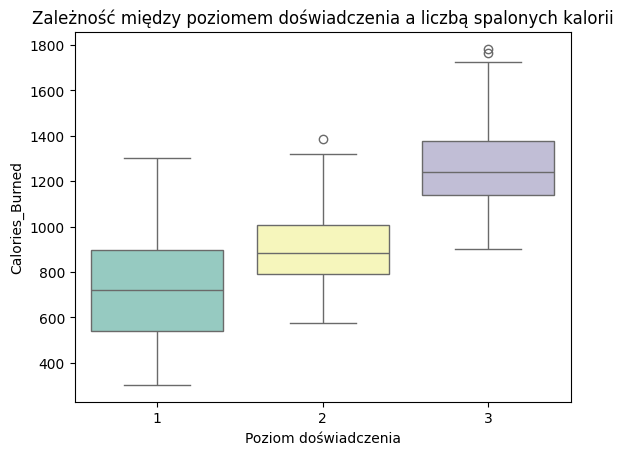

In [13]:
# Zalezność między poziomem doświadczenia a liczbą spalonych kalorii
sns.boxplot(data=df_silownia, x='Experience_Level', y='Calories_Burned', palette='Set3')
plt.title('Zależność między poziomem doświadczenia a liczbą spalonych kalorii')
plt.xlabel('Poziom doświadczenia')

Interpretacja: Bardziej zaawansowani użytkownicy spalają więcej kalorii, ale z większym rozrzutem wyników.


/var/folders/mv/gl_0swbd1d7b76j07453s1n80000gn/T/ipykernel_17248/1287331168.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_silownia, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', ci=None)


Text(0, 0.5, 'Spożycie wody (litry)')

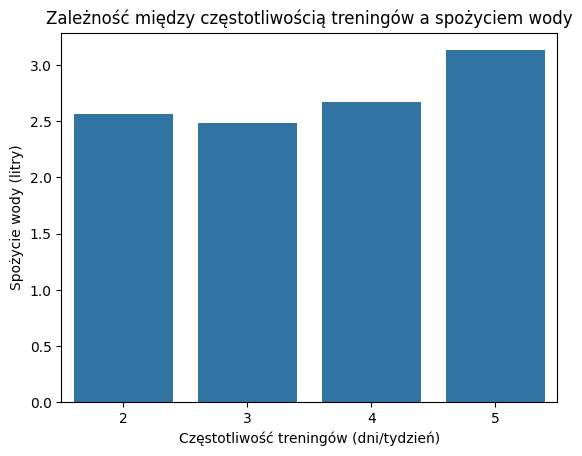

In [14]:
# Zależność między częstotliwością treningów a spożyciem wody

sns.barplot(data=df_silownia, x='Workout_Frequency (days/week)', y='Water_Intake (liters)', ci=None)
plt.title('Zależność między częstotliwością treningów a spożyciem wody')
plt.xlabel('Częstotliwość treningów (dni/tydzień)')
plt.ylabel('Spożycie wody (litry)')

Interpretacja: Osoby trenujące częściej wypijają średnio więcej wody.


# 4. Analiza opisowa
*2-3 analizy opisowe, odnoszące się do pytania badawczego (pytań). Każdej analizie powinna towarzyszyć krótka (1-3 zdania) interpretacja.*

Pytania badawcze

Czy płeć wpływa na wybór rodzaju aktywności fizycznej?
Czy wiek, poziom doświadczenia i częstotliwość treningów mają wpływ na spalanie kalorii?
Czy osoby o wyższym BMI mają wyższe tętno spoczynkowe lub niższą wydolność (niższy max BPM)?

In [15]:
# Zależność między rodzajem aktywności a średnim BMI

df_silownia.groupby('Workout_Type')['BMI'].mean()    

Workout_Type
Cardio      25.064709
HIIT        24.885342
Strength    24.766461
Yoga        24.531420
Name: BMI, dtype: float64

In [16]:
# Zaleznosc między płcią a poziomem doświadczenia

df_silownia.groupby('Gender')['Experience_Level'].mean()

Gender
Female    1.807359
Male      1.812133
Name: Experience_Level, dtype: float64

Interpretacja: Mężczyźni w tym zbiorze mają nieco wyższy poziom doświadczenia treningowego niż kobiety.

In [17]:
#Czy osoby z wysokim Fat_Percentage mają niższą aktywność?

df_silownia['High_Fat'] = df_silownia['Fat_Percentage'] > df_silownia['Fat_Percentage'].median()
df_silownia.groupby('High_Fat')['Workout_Frequency (days/week)'].mean()


High_Fat
False    3.631902
True     3.008264
Name: Workout_Frequency (days/week), dtype: float64

Interpretacja: Osoby z wyższym poziomem tłuszczu trenują rzadziej niż osoby z niższym.

# 5. Wnioskowanie statystyczne
*Odnoszące się do pytań badawczych testy statystyczne (w tabeli lub na wizualizacjach) odpowiednie do załozeń, danych.*

# 6. Wnioski
*Wyciągnięcie wniosków na temat zbioru danych i postawionych pytań.*